# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
pip install scikeras


In [2]:
#pip install scikeras


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve

#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

# importing SMOTE
from imblearn.over_sampling import SMOTE
import random

#Importing classback API
from keras import callbacks

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [4]:
# read the data
data = pd.read_csv('/content/drive/MyDrive/Python Course/Project7/Churn.csv')


In [5]:
df = data.copy()

## Data Overview

In [6]:
# returns the first 10 rows
df.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

In [7]:
# returns the last 10 rows
df.tail(10)

RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
9990       9991    15798964   Nkemakonam          714   Germany    Male   33   
9991       9992    15769959  Ajuluchukwu          597    France  Female   53   
9992       9993    15657105  Chukwualuka          726     Spain    Male   36   
9993       9994    15569266       Rahman          644    France    Male   28   
9994       9995    15719294         Wood          800    France  Female   29   
9995       9996    15606229     Obijiaku          771    France    Male   39   
9996       9997    15569892    Johnstone          516    France    Male   35   
9997       9998    15584532          Liu          709    France  Female   36   
9998       9999    15682355    Sabbatini          772   Germany    Male   42   
9999      10000    15628319       Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9990       3   35016.60              1          1               0   
9991       4   88381.21              1          1               0   
9992       2       0.00              1          1               0   
9993       7  155060.41              1          1               0   
9994       2       0.00              2          0               0   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9990         53667.08       0  
9991         69384.71       1  
9992        195192.40       0  
9993         29179.52       0  
9994        167773.55       0  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

## Find the shape of the dataset

In [8]:
df.shape

(10000, 14)

### Concise summary of the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Observations:

* There are 3 object type Surname, Geography and Gender and 11 numerical columns.
* We can see that the total number of observations are 10000 and that there are no missing values in all 13 columns.
* The memory usage is around 1.1+ MB

### Find unique values

In [10]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### Observations:
* The columns RowNumber and CustomerId have 10000 unique values.
* The categorical column Surname have 2932 unique values.
* There are 3 unique values for the Geography column.


### Statistical Summary

In [11]:
df.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

#### Observations:
* There are a total of 10000 observations and 11 features in the dataset.
* RowNumber seems to be a serial number. This column seems to contain unique values and may not add any value to the prediction.
* The CustomerId is a unique ID that represents customers. This column seems to contain unique values and may not add any value to the prediction.
* The min, max and mean CreditScore is 350, 850 and 650
* The min, max and mean Age are 18, 92 and 39 respectively.
* The min, max and mean Tenure are 0, 10 and 5.
* The min, max and mean Balance held by the customer are 0, 250898 and about 76486. There is a big difference between the min and max value. We must explore this further in the univariate analysis.
* The min, max and mean NumOfProducts that the customers have purchased are 1, 4 and about 2 respectively.
* The min, max and mean values of the HasCrCard are 0, 1, and 0.71 which can be rounded to 1.
* The min, max and mean values of the IsActiveMember is 0, 1 and 0.52 which can be rounded to 1.
* The min, max and mean values of the EstimatedSalary is 11.58, 199992.48 and 100090. We can see that the min and max values differ a lot and the mean value is closer to the max value, suggesting the existence of lower outliers. We need to analyse this using univariate analysis.
* The min, max and mean values of the Exited column are 0, 1 and almost 0.

In [12]:
df.describe(include=["object"]).T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

In [13]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

#### Observations:
* The Surname column contains the surnames of the bank customers with 2932 unique values and Smith is the surname of most of the customers. This column probably does not add any valueable value to the prediction. So, this column may be dropped.
* The Geography column can have 3 unique values, France, Germany and Spain, with most customers belonging to France.
* The Gender column can have 2 unique values, Male and Female with 5457 Male customers being the most frequent customers.

### Checking for Missing Values

In [14]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Observation:
* There are no missing values.

#### Checking for duplicate values

In [16]:
df.duplicated().sum()

0

#### Observations:
* There are no duplicate values.

### Drop the columns which are unique for all users like IDs, names, and rownumbers

In [17]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [18]:
# function to get the lower and upper bounds in distribution of data for different columns in the dataset

def get_lower_upper(data, upper=True):
    """
    data: Series
    """
    #calculate first quartile Q1
    Q1 = data.quantile(q=0.25)

    #calculate first quartile Q3
    Q3 = data.quantile(q=0.75)

    #calculate Inter Quartile Range (IQR)
    IQR = Q3 - Q1

    if upper == True:
        #Calculate the upper bound
        val = Q3 + 1.5 * IQR
    else:
        #Calculate the lower bound
        val = Q1 - 1.5 * IQR

    return val

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.axvline(
        data[feature].quantile(q=0.25), color="red", linestyle="-"
    ) # Add 25% to the histogram
    ax_hist2.axvline(
        data[feature].quantile(q=0.75), color="blue", linestyle="-"
    ) # Add 75% to the histogram

    #use the get_lower_upper method to get the lower range and upper range of the data distributions
    upper_range = get_lower_upper(data[feature])
    lower_range = get_lower_upper(data[feature], False)

    ax_hist2.axvline(
        lower_range, color="brown", linestyle="-"
    )# Add the lower range to the histogram

    ax_hist2.axvline(
        upper_range, color="yellow", linestyle="-"
    )# Add the higher range to the histogram

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### CreditScore

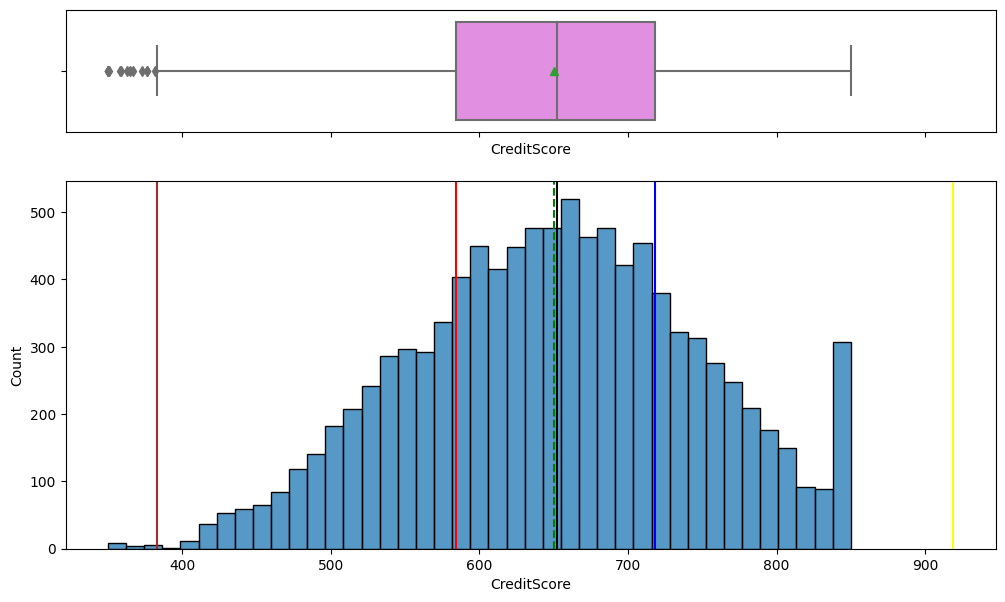

In [21]:
histogram_boxplot(df,'CreditScore')


#### Geography

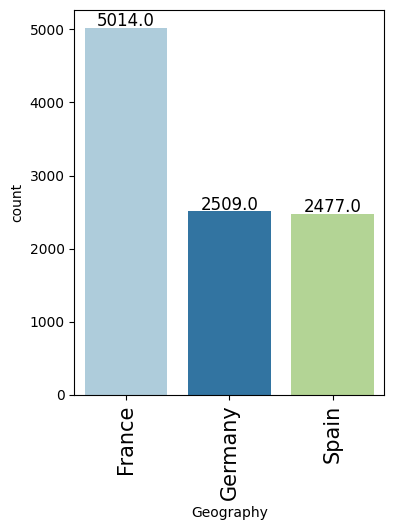

In [22]:
labeled_barplot(df, "Geography")

#### Gender

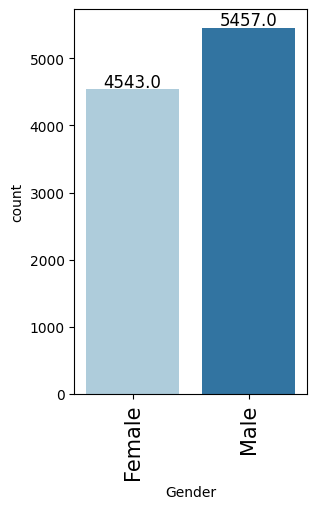

In [23]:
labeled_barplot(df, "Gender")

#### Age

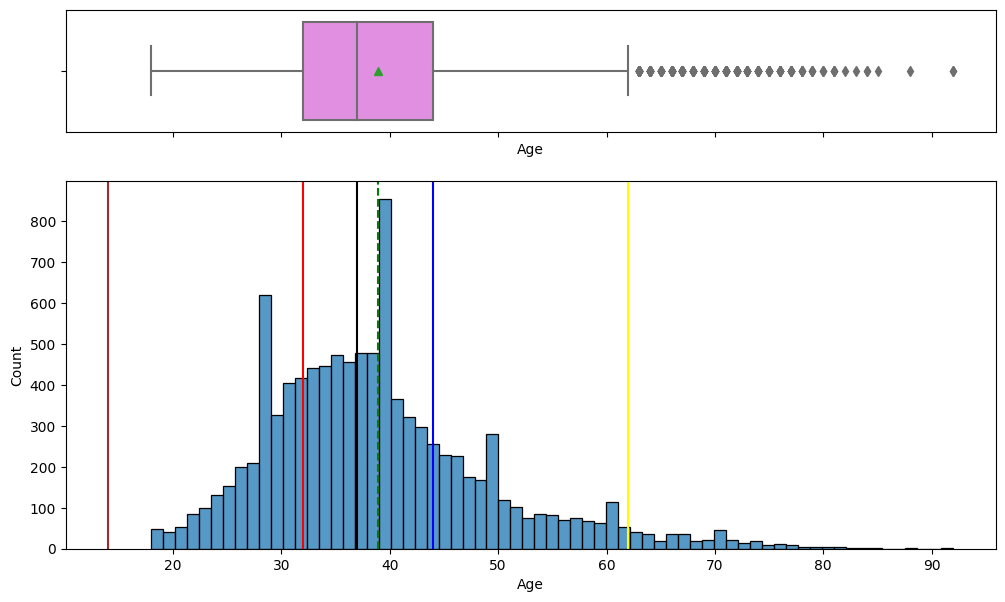

In [24]:
histogram_boxplot(df,'Age')

#### Tenure

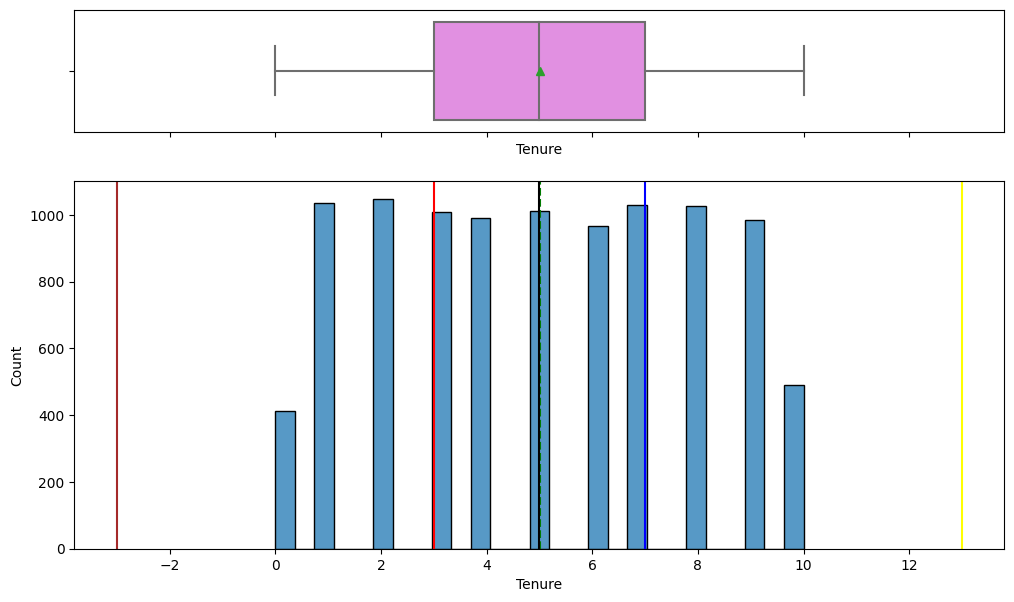

In [25]:
histogram_boxplot(df,'Tenure')

* The median and mean in the above plot are equal which is 5 years. So, the distribution is normal. There are no outliers.
* The customers in this dataset have been with the bank from 0 to 10 years in this dataset.

#### Balance

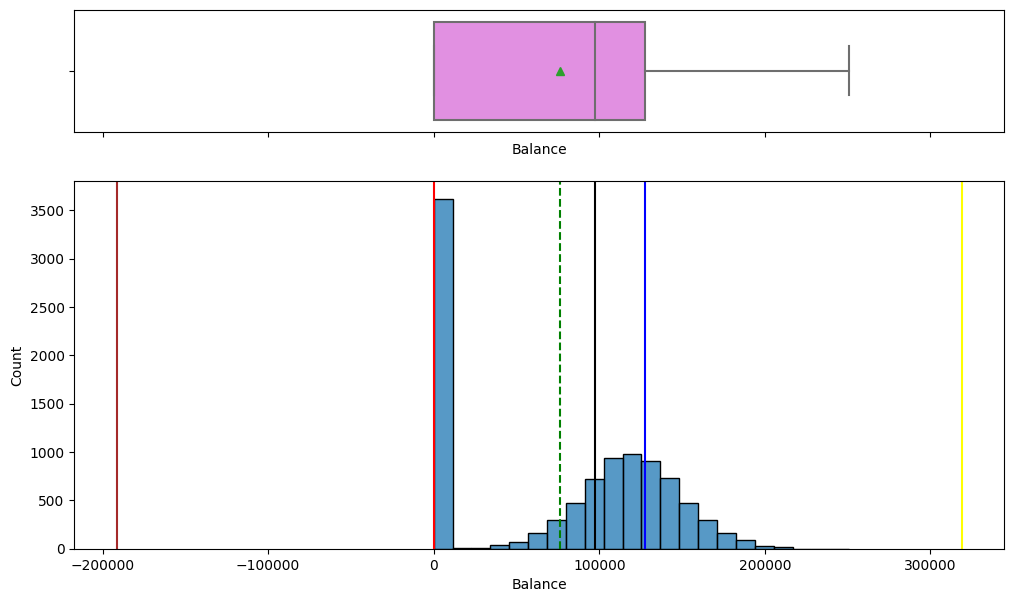

In [26]:
histogram_boxplot(df,'Balance')

* The data distribution for Balance is right skewed.
* There are no outliers and the maximum number of customers in the dataset have 0 balance amount.

#### NumOfProducts

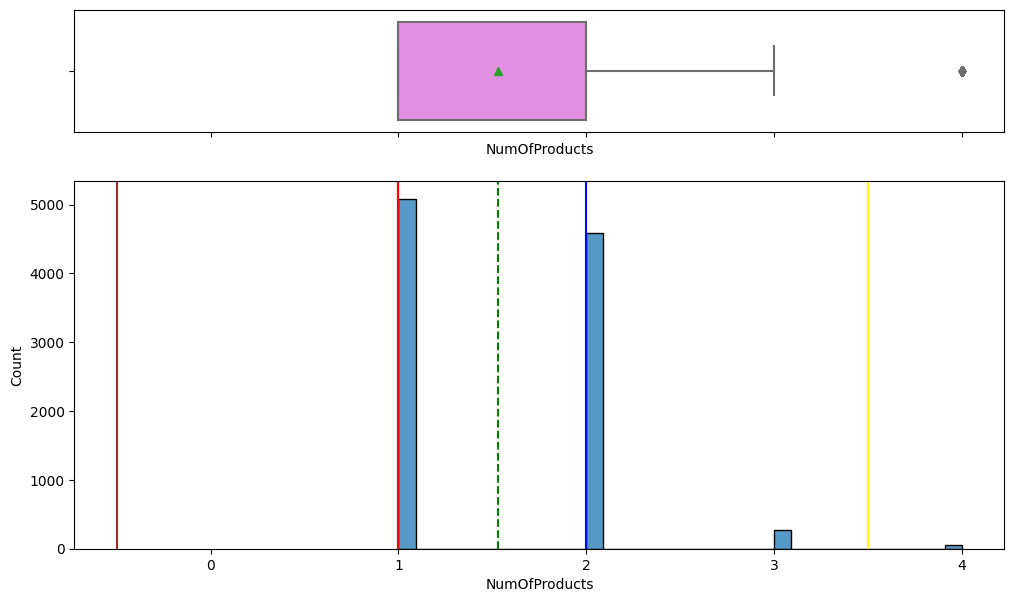

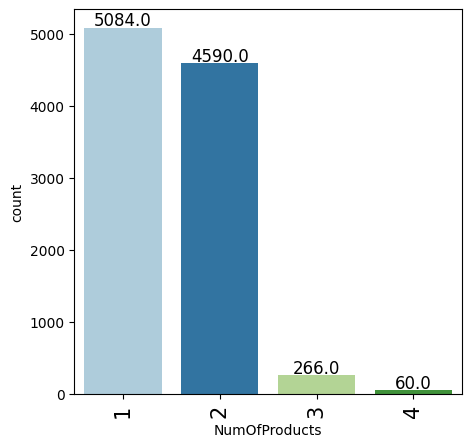

In [27]:
histogram_boxplot(df,'NumOfProducts')
labeled_barplot(df, "NumOfProducts")

* The distribution in the above plot for NumOfProducts is right skewed.
* The customers who own more than 3 products throught the bank are considered as outliers.
* Most of the customers hve only 1 product and only 60 customers own 4 products.

#### HasCrCard

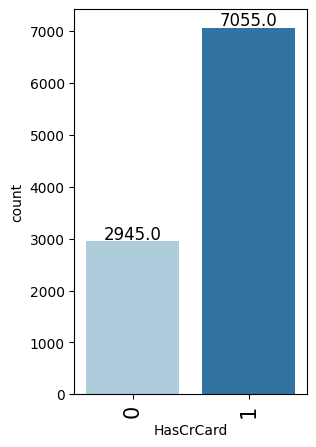

In [28]:
labeled_barplot(df,'HasCrCard')

* Most of the customers in this dataset have a credit card of the bank.

#### IsActiveMember

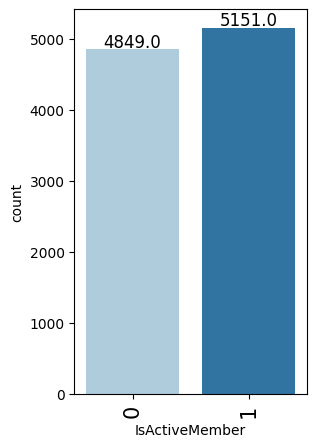

In [29]:
labeled_barplot(df,'IsActiveMember')

* 51.51% of the customers are active members of the bank and 48.49% of the customers are inactive members.

#### EstimatedSalary

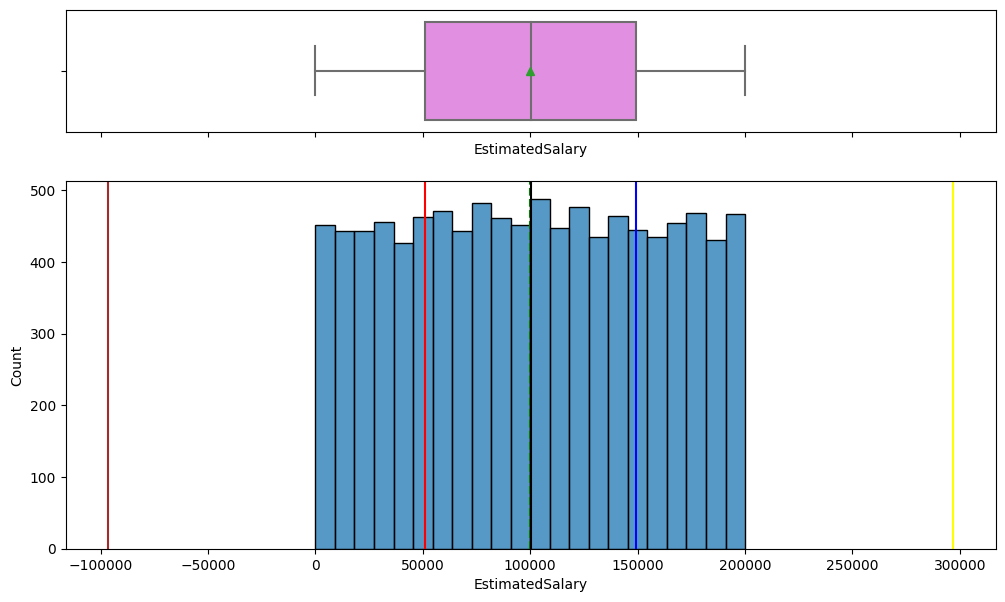

In [30]:
histogram_boxplot(df,'EstimatedSalary')

* The mean and median are almost same in the above distribution plot of Estimated salary and there are no outliers. So, it is a normal distribution.
* The salary of the customers lie between 0 and 200000 dollars.

#### Exited

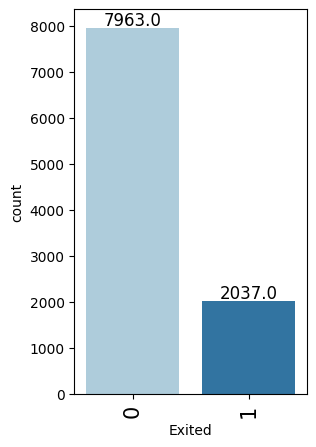

In [31]:
labeled_barplot(df,'Exited')

* 79.63% of customers have not exited, while 20.37% of the customers have churned.

### Bivariate Analysis

In [32]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [33]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation between columns with heatmap

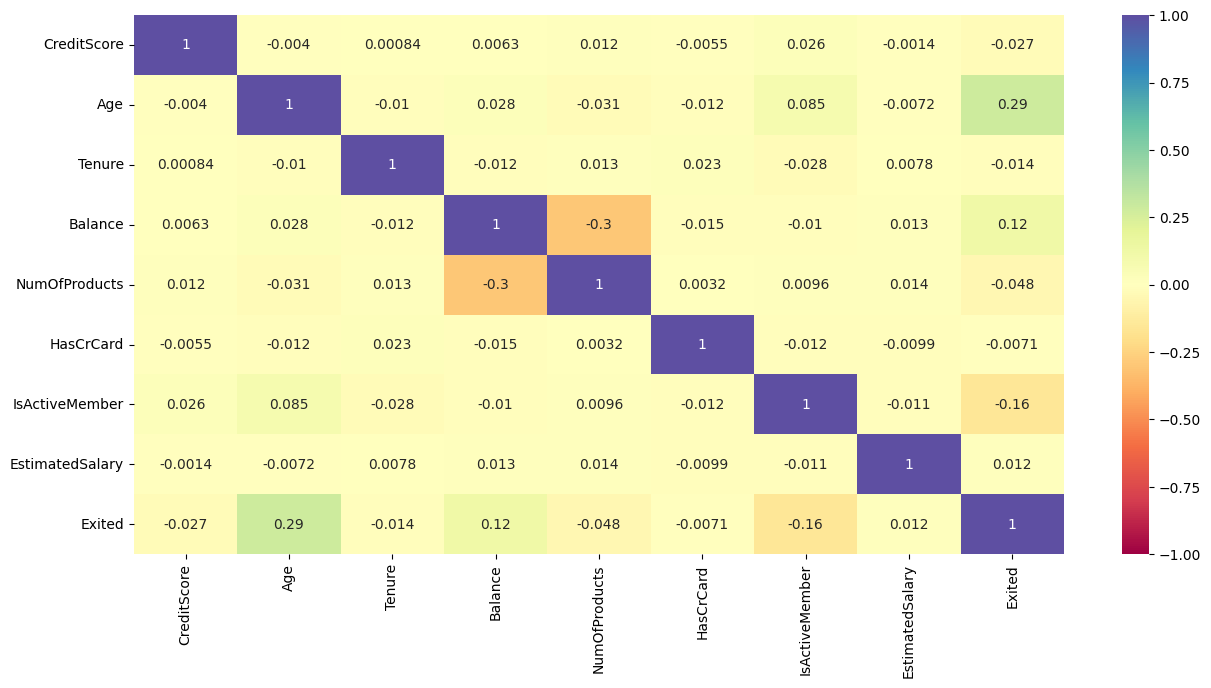

In [34]:
#Let us find the correlation and plot the heatmap
corr = df.corr()
#['cost_of_the_order','day_of_the_week','food_preparation_time', 'ratingnum']
plt.figure(figsize=(15, 7))
sns.heatmap(data=df.corr(), annot=True, vmin=-1, vmax=1,cmap="Spectral");
plt.show()

#### Observaions:
* From the heatmap we can observe that the Age and Exited columns are slightly positively correlated. So, the older customers are likely to churn.
* Balance is slightly positely correlated to EExited as well. So, the higher the balance, the customer might be likely to churn.
* The Balance and NumOfProducts are negatively correlated.So, lesser the balance, higher the number of products the customers have purchased through the bank.
* IsActiveMember is slightly negatively correlated to Exited. So, if the customer has not been an active member of the bank, they might churn.



<Figure size 2000x1500 with 0 Axes>

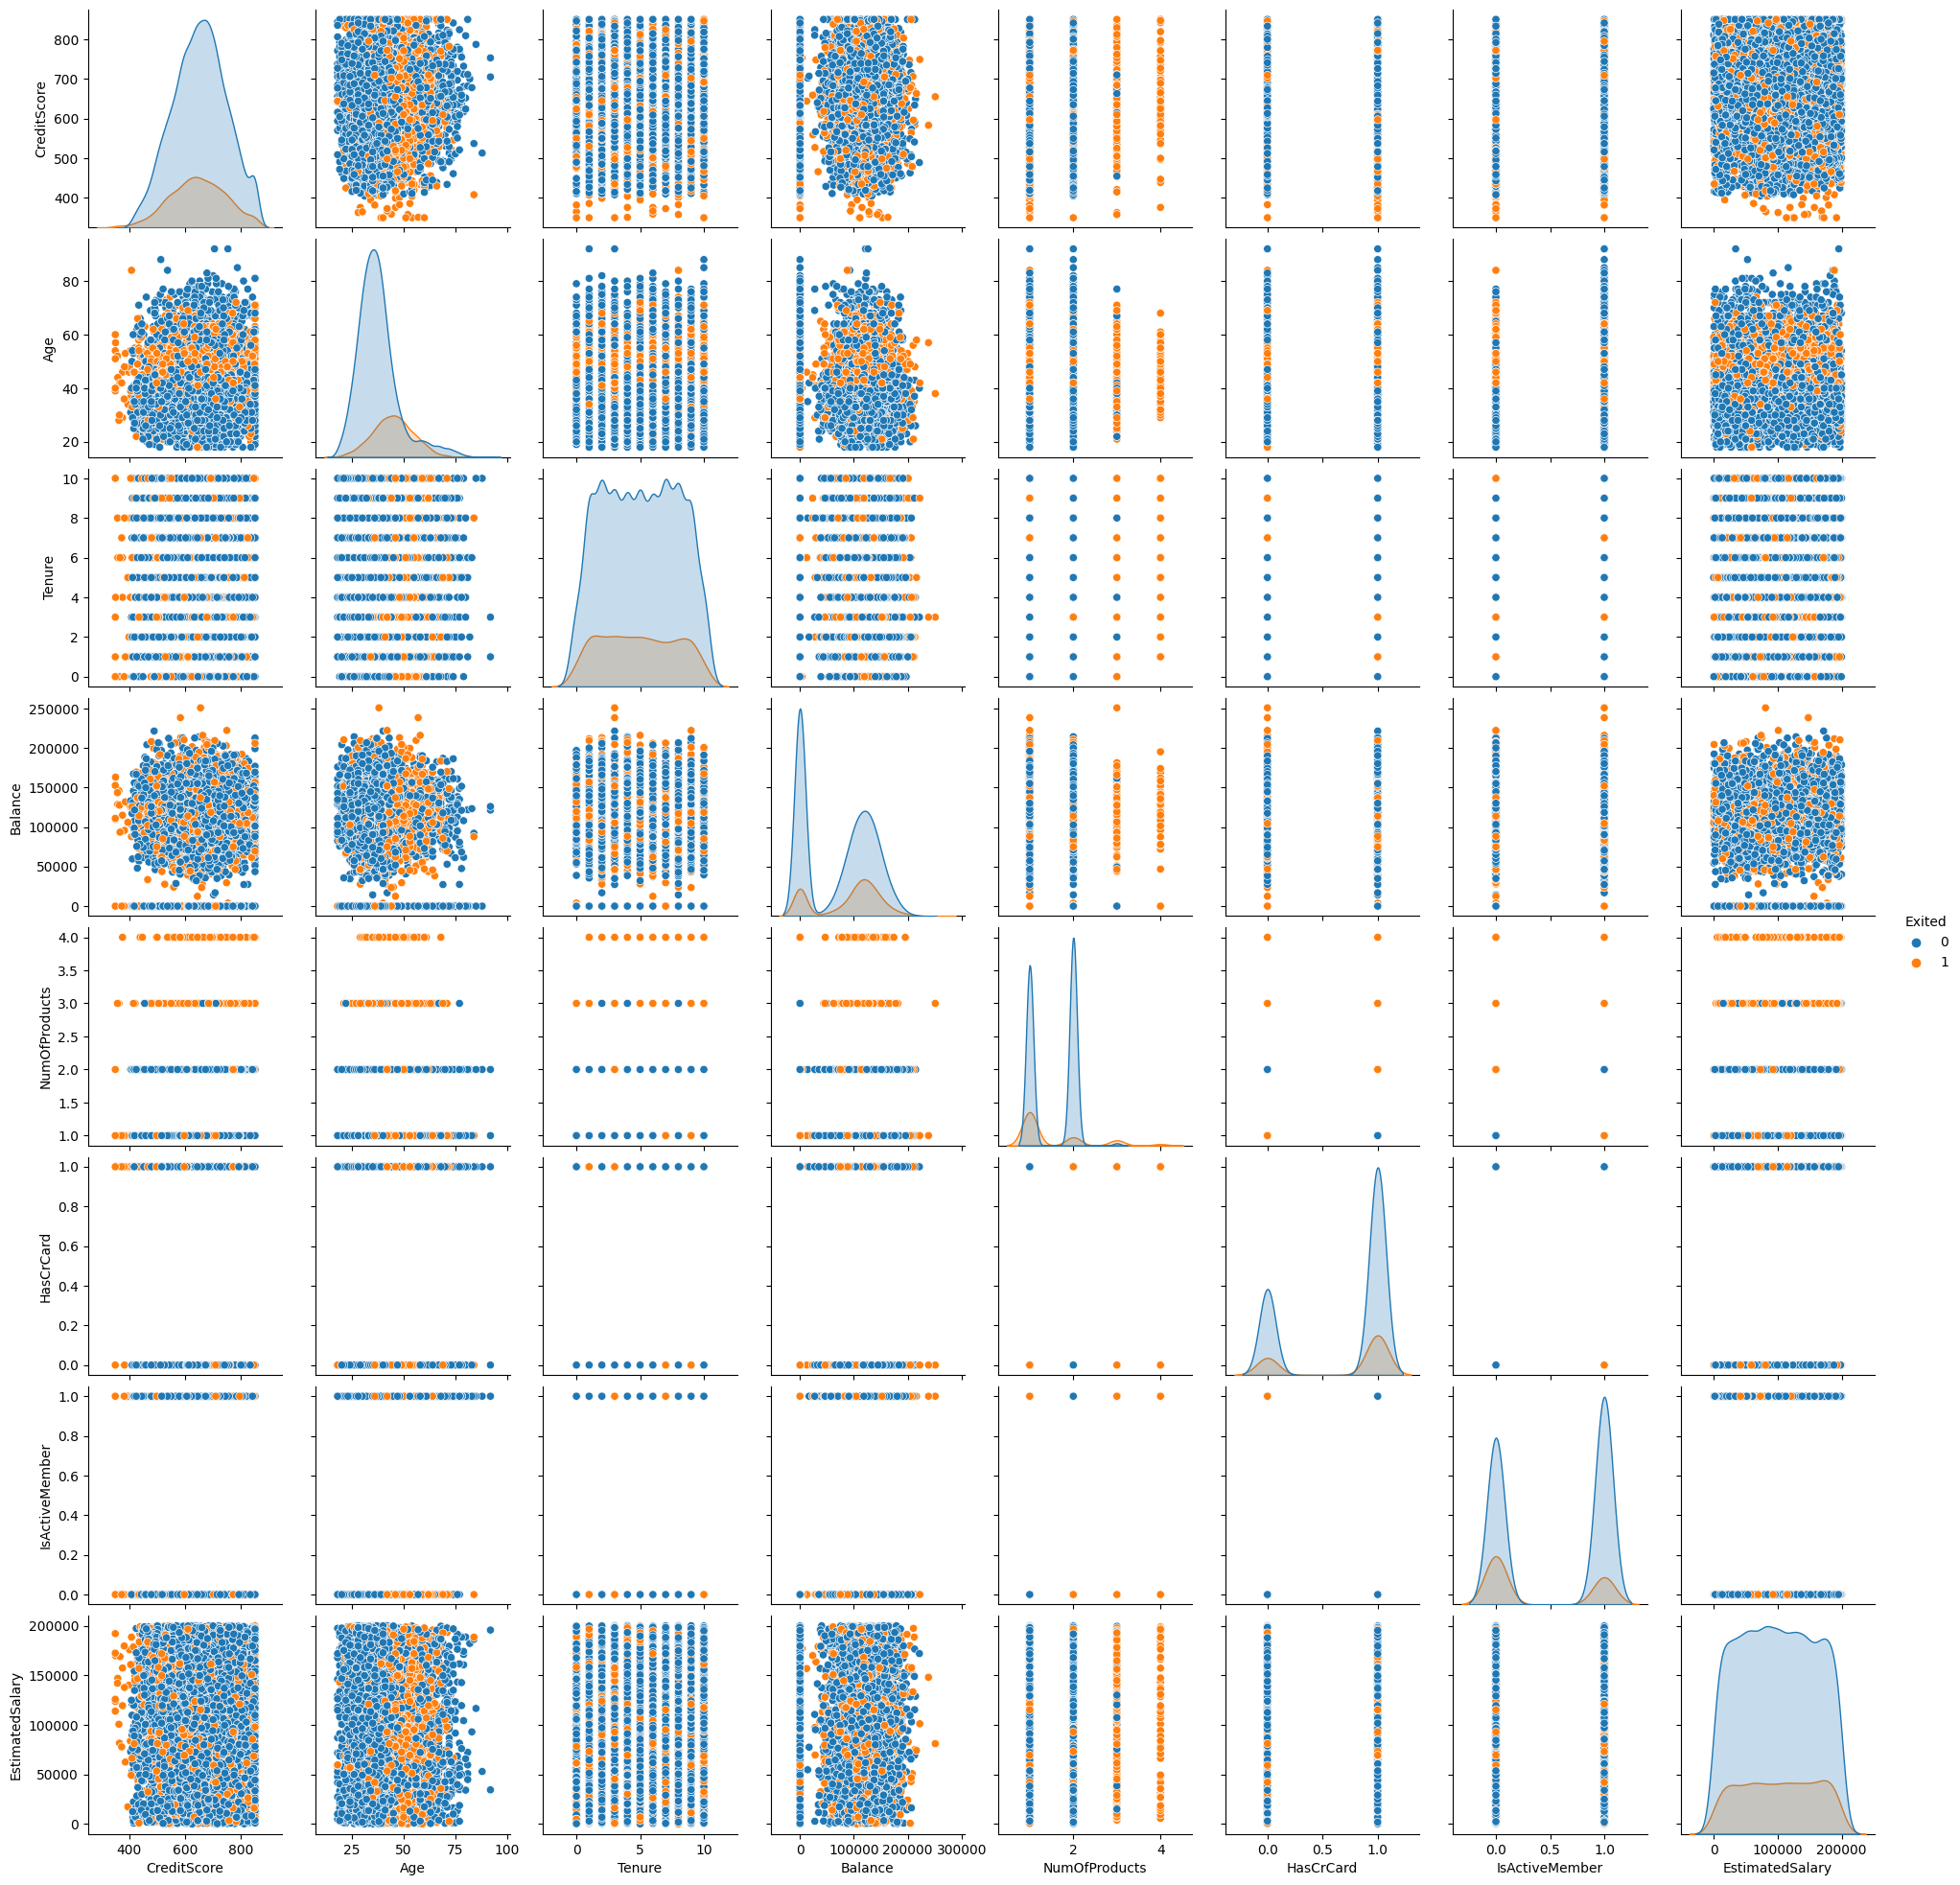

In [35]:
plt.figure(figsize=(20, 15))
sns.pairplot(data=df,hue='Exited')
plt.show()

 #### **Exited Vs Geography**

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


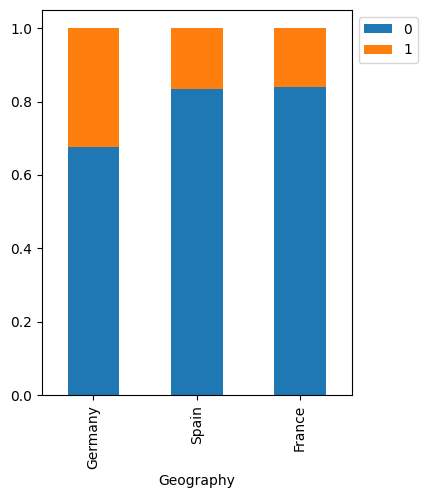

In [36]:
stacked_barplot(df, "Geography", "Exited" )

* There are more customers from France and almost same number of customers from Germany and Spain.
* Almost 33% of German customers, 16.15% of French and 16.67% of Spanish customers have exited.

#### **Exited Vs Gender**

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


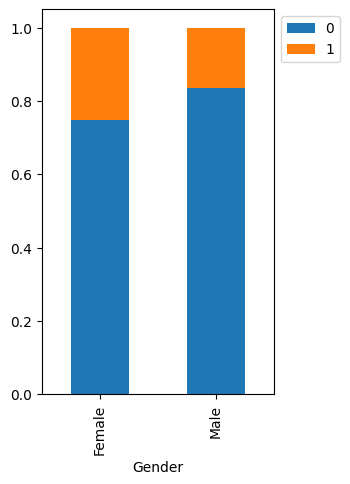

In [37]:
stacked_barplot(df, "Gender", "Exited" )

* There are more male customers than females.
* More female customers (25%) have exited than the male customers (16.46%).

#### **Exited Vs Has Credit Card**

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


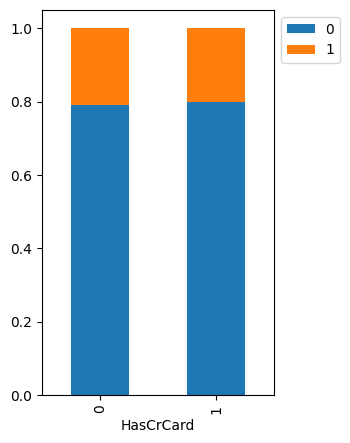

In [38]:
stacked_barplot(df, "HasCrCard", "Exited" )

* The customers who have credit card are more in number than the customers who have no credit cards.
* But, the percentage of customers who have credit cards who have existed is about the same as the percentage of customers who do not have a credit card.


#### **Exited Vs IsActiveMember**

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


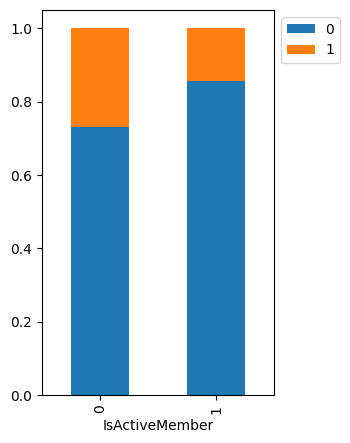

In [39]:
stacked_barplot(df, "IsActiveMember", "Exited" )

* There are more active members of the bank as there are non active members.
* About 26.85% of active members have exited the bank and 14.27% of non active members have exited.

#### **Exited Vs Credit Score**

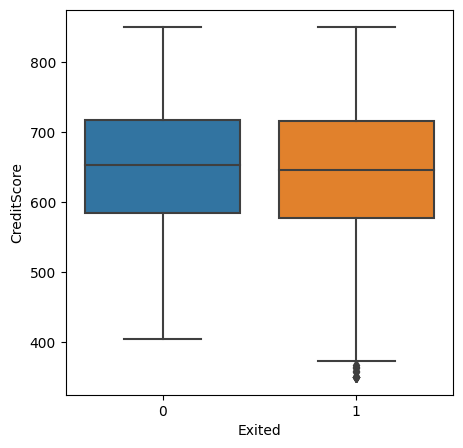

In [40]:
## Plot the boxplot for Exited and CreditScore
plt.figure(figsize=(5,5))
sns.boxplot(x='Exited',y='CreditScore',data=df)
plt.show()

Exited          0     1    All
CreditScore                   
All          7963  2037  10000
850           190    43    233
651            33    17     50
705            37    16     53
637            32    14     46
...           ...   ...    ...
810             6     0      6
442             1     0      1
488            10     0     10
814            11     0     11
472             8     0      8

[461 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


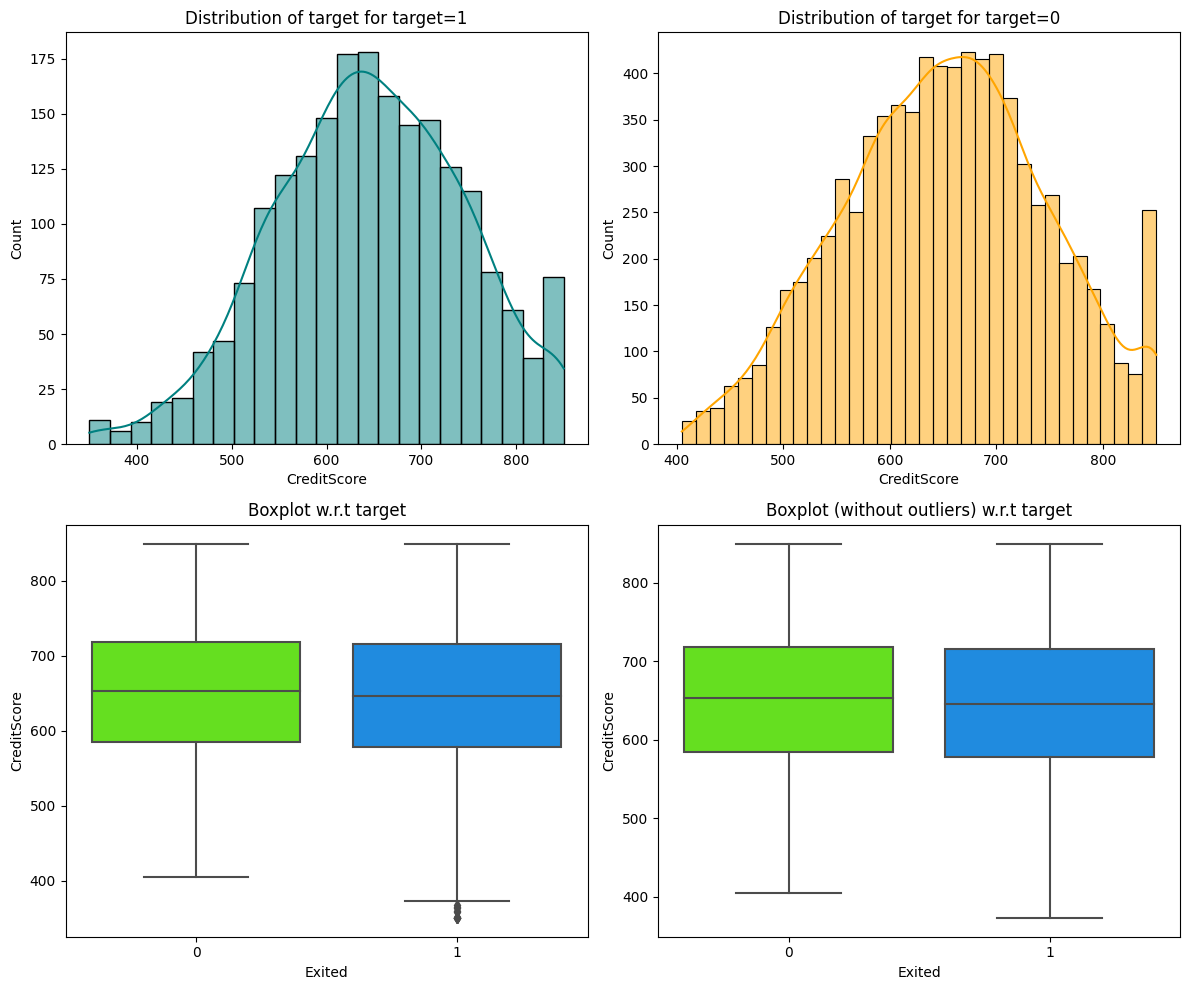

In [41]:
distribution_plot_wrt_target(df, "CreditScore", "Exited")

* We can observe that there are a few customers who have very low credit scores have exited.
* But other than that, the distribution for credit scores of customers who have exited and those who have not exited look very similar.

#### **Exited Vs Age**

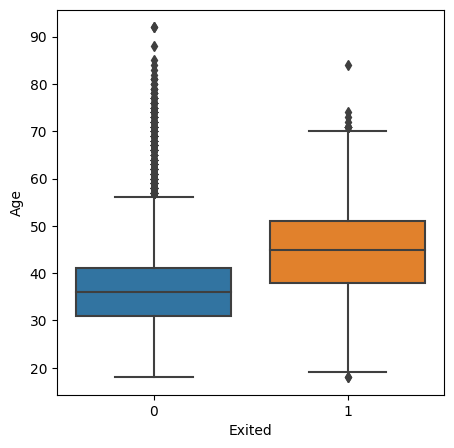

In [42]:
## Plot the boxplot for Exited and Age
plt.figure(figsize=(5,5))
sns.boxplot(x='Exited',y='Age',data=df)
plt.show()


Exited     0     1    All
Age                      
All     7963  2037  10000
46       135    91    226
40       343    89    432
43       209    88    297
45       142    87    229
..       ...   ...    ...
79         4     0      4
78         5     0      5
77        10     0     10
76        11     0     11
75         9     0      9

[71 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


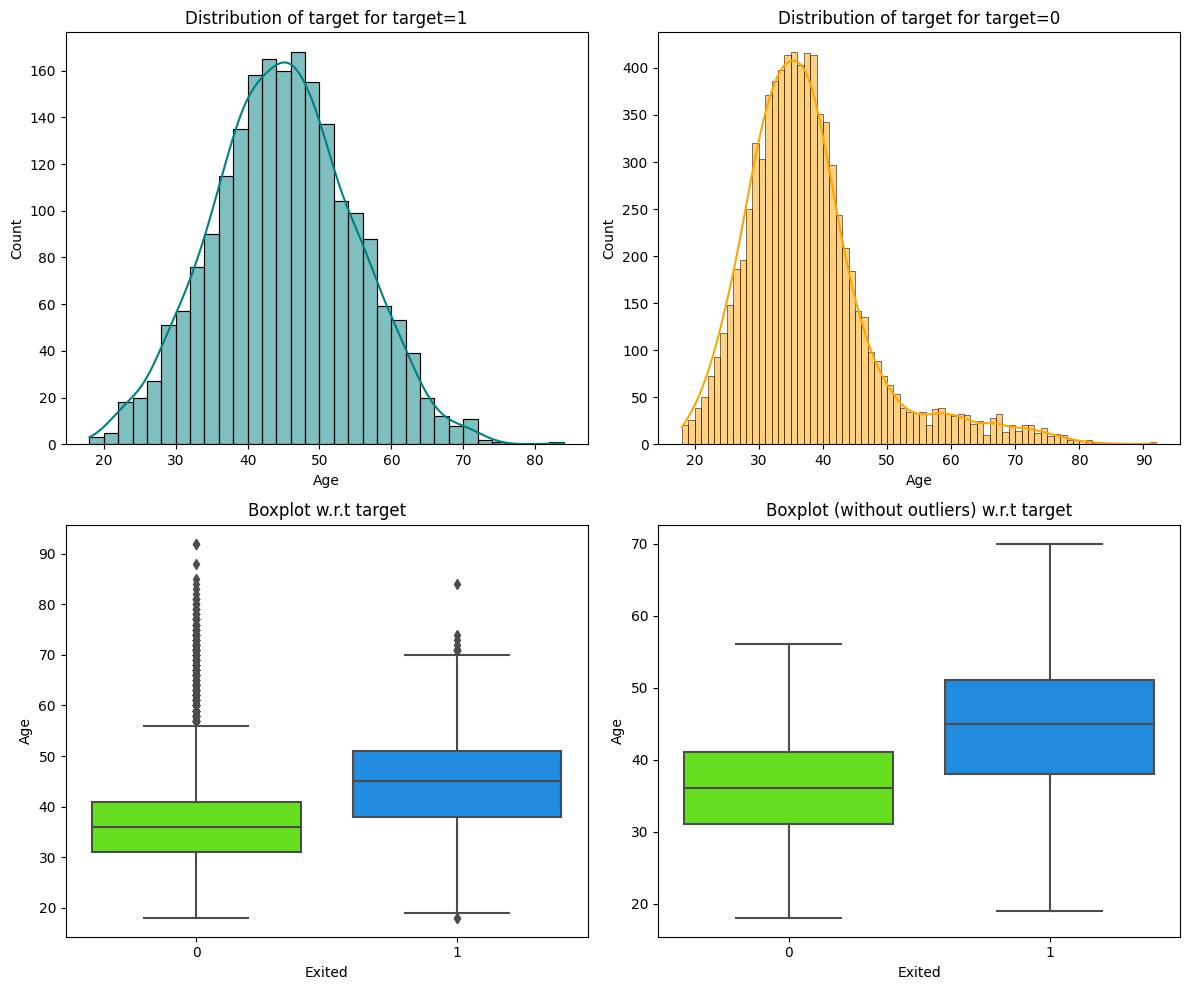

In [43]:
distribution_plot_wrt_target(df, "Age", "Exited")

In [44]:

mean_exited = df[df["Exited"]==1]["Age"].mean()
mean_notExited = df[df["Exited"]==0]["Age"].mean()
median_exited = df[df["Exited"]==1]["Age"].median()
median_notExited = df[df["Exited"]==0]["Age"].median()
print("mean_exited: ",mean_exited,"mean_notExited: ",mean_notExited," median_exited: ",median_exited," median_notExited: ",median_notExited)

mean_exited:  44.8379970544919 mean_notExited:  37.40838879819164  median_exited:  45.0  median_notExited:  36.0


* The mean age of customers who have exited is about 45 years and the mean age of customers who have not exited is about 37 years. So, most younger customers do not
* The above distribution for customers who have not exited is highly right skewed while the customers who have exited have almost normal distribution.

#### **Exited Vs Tenure**

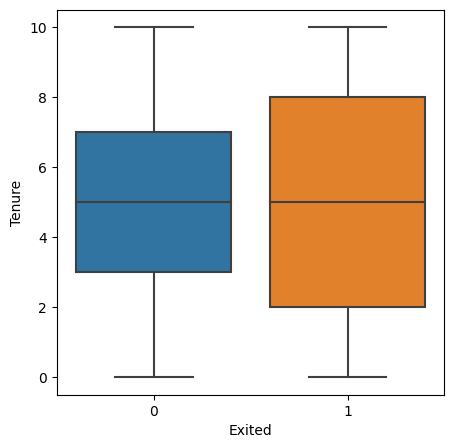

In [45]:
## Plot the boxplot for Exited and Tenure
plt.figure(figsize=(5,5))
sns.boxplot(x='Exited',y='Tenure',data=df)
plt.show()

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


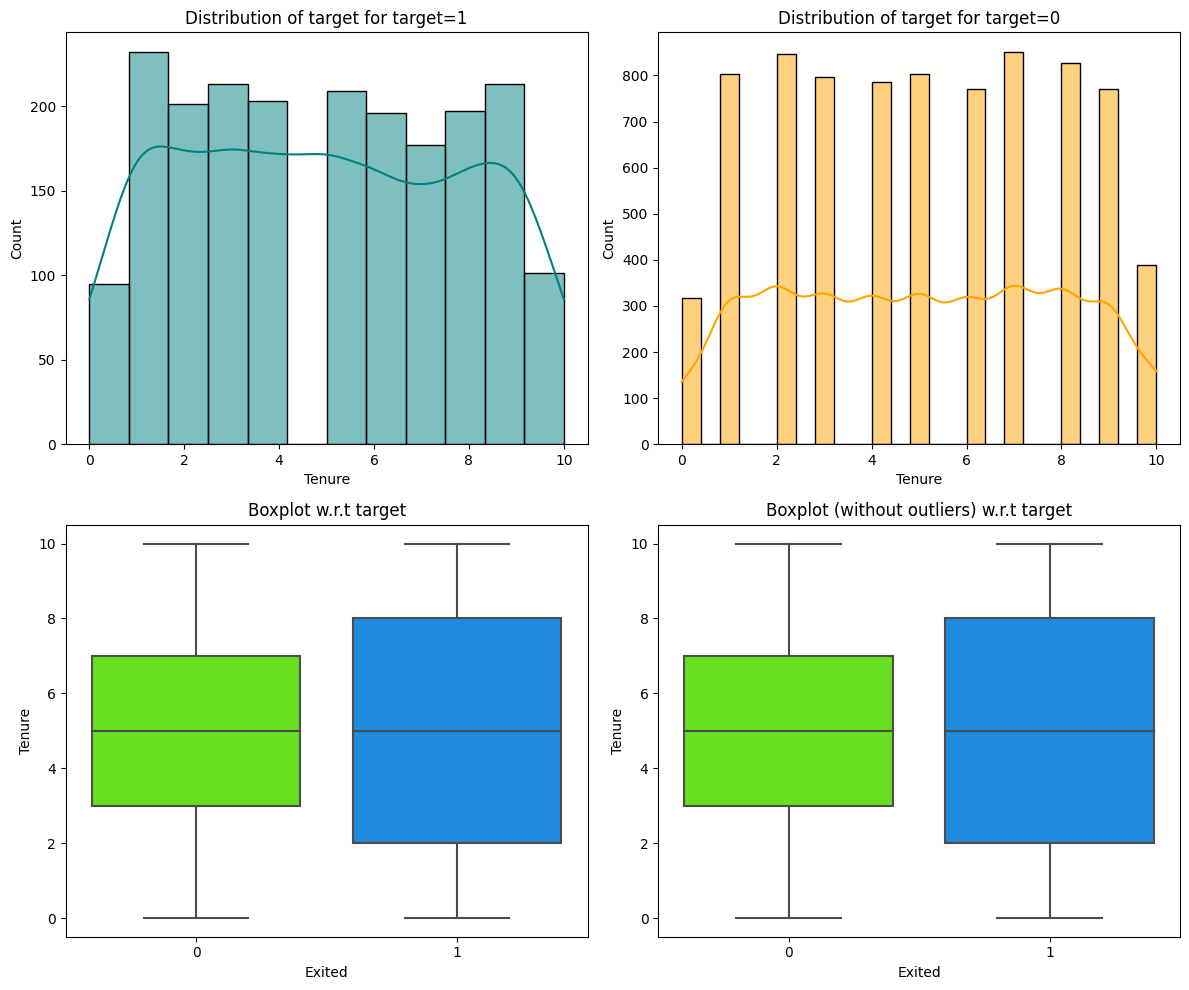

In [46]:
distribution_plot_wrt_target(df, "Tenure", "Exited")

In [47]:
mean_exited_tenure = df[df["Exited"]==1]["Tenure"].mean()
mean_notExited_tenure = df[df["Exited"]==0]["Tenure"].mean()
median_exited_tenure = df[df["Exited"]==1]["Tenure"].median()
median_notExited_tenure = df[df["Exited"]==0]["Tenure"].median()
print("mean_exited: ",mean_exited_tenure,"mean_notExited: ",mean_notExited_tenure," median_exited: ",median_exited_tenure," median_notExited: ",median_notExited_tenure)

mean_exited:  4.932744231713304 mean_notExited:  5.033278914981791  median_exited:  5.0  median_notExited:  5.0


* The above plots for the customers who have both exited and not exited are not skewed and look like they have almost same mean.
* Both the distributions are normal with no outliers.

#### **Exited Vs Balance**

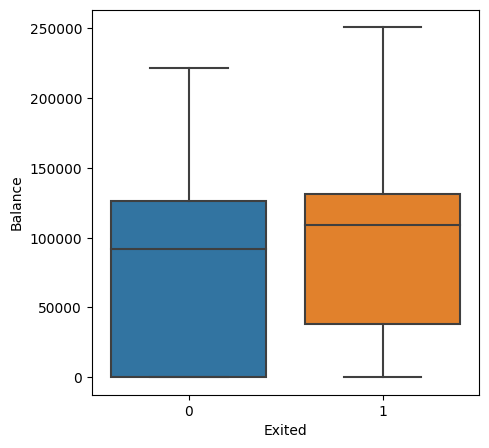

In [48]:
## Plot the boxplot for Exited and Balance
plt.figure(figsize=(5,5))
sns.boxplot(x='Exited',y='Balance',data=df)
plt.show()

Exited        0     1    All
Balance                     
All        7963  2037  10000
0.0        3117   500   3617
12459.19      0     1      1
116973.26     0     1      1
116755.5      0     1      1
...         ...   ...    ...
117864.85     1     0      1
117852.26     1     0      1
85982.07      1     0      1
85996.19      1     0      1
127146.68     1     0      1

[6383 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


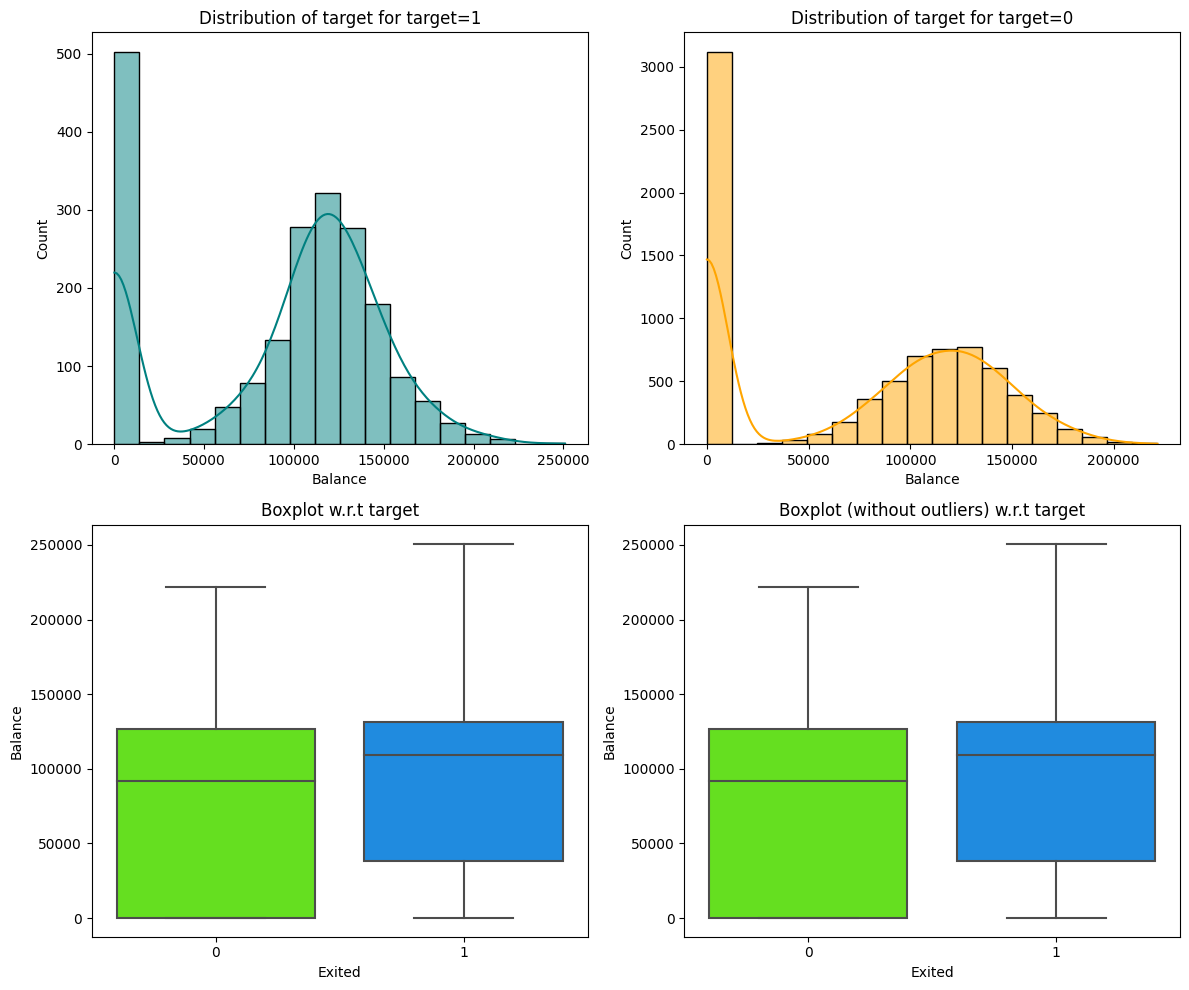

In [49]:
distribution_plot_wrt_target(df, "Balance", "Exited")

In [50]:
mean_exited_bal = df[df["Exited"]==1]["Balance"].mean()
mean_notExited_bal = df[df["Exited"]==0]["Balance"].mean()
median_exited_bal = df[df["Exited"]==1]["Balance"].median()
median_notExited_bal = df[df["Exited"]==0]["Balance"].median()
print("mean_exited: ",mean_exited_bal,"mean_notExited: ",mean_notExited_bal," median_exited: ",median_exited_bal," median_notExited: ",median_notExited_bal)

mean_exited:  91108.53933726068 mean_notExited:  72745.2967788522  median_exited:  109349.29  median_notExited:  92072.68


* Most number of customers in this dataset have no balance.
* The customers with lower balance have not exited.
* Approximately 75% of customers who have not exited have balances less than around 125,000 dollars

#### **Exited Vs Number of Products**

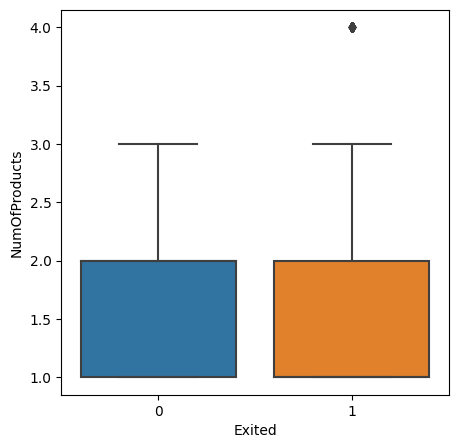

In [51]:
## Plot the boxplot for Exited and Number of products
plt.figure(figsize=(5,5))
sns.boxplot(x='Exited',y='NumOfProducts',data=df)
plt.show()

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


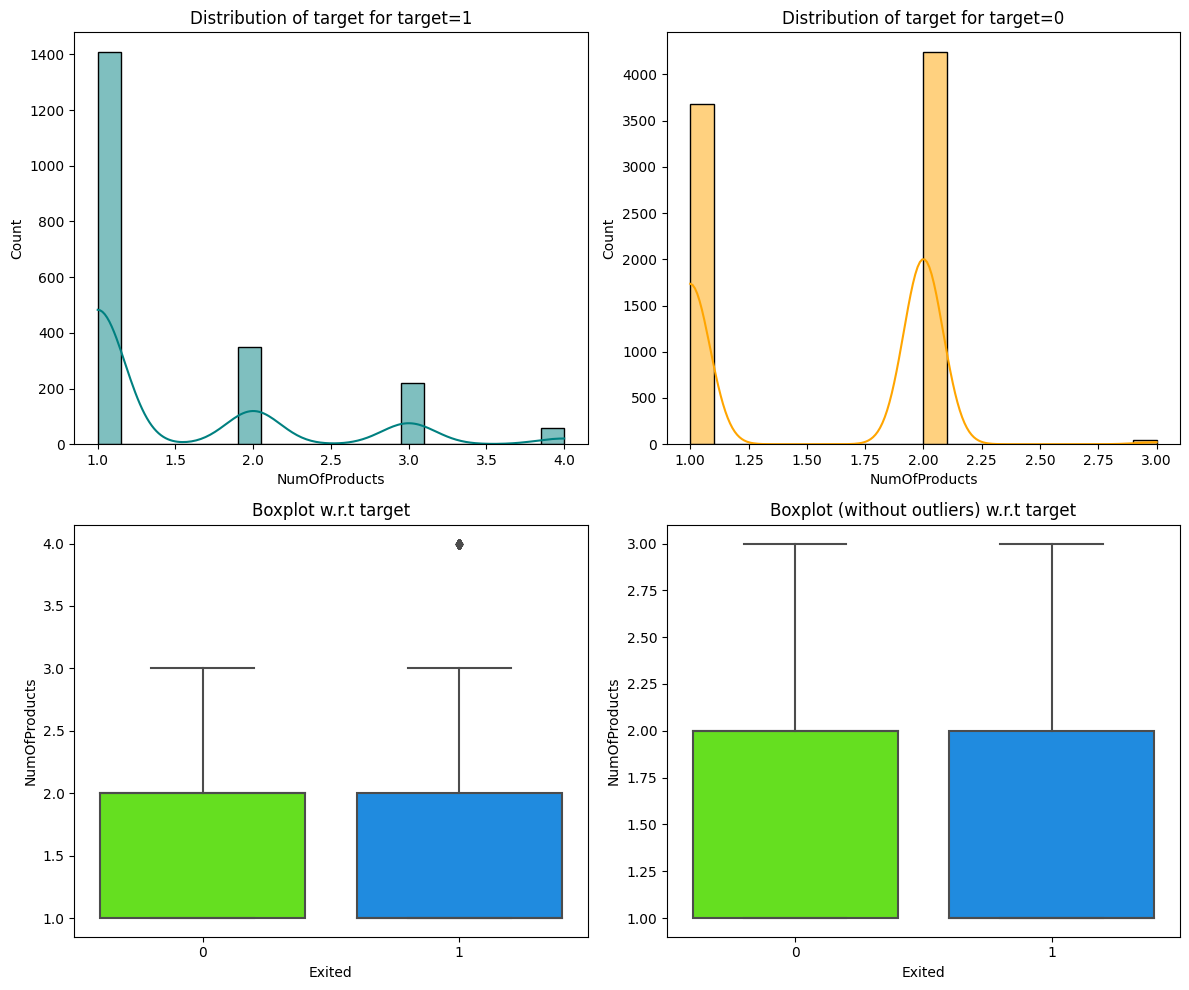

In [52]:
distribution_plot_wrt_target(df, "NumOfProducts", "Exited")

In [53]:
mean_exited_n = df[df["Exited"]==1]["NumOfProducts"].mean()
mean_notExited_n = df[df["Exited"]==0]["NumOfProducts"].mean()
median_exited_n = df[df["Exited"]==1]["NumOfProducts"].median()
median_notExited_n = df[df["Exited"]==0]["NumOfProducts"].median()
print("mean_exited: ",mean_exited_n,"mean_notExited: ",mean_notExited_n," median_exited: ",median_exited_n," median_notExited: ",median_notExited_n)

mean_exited:  1.4752086401570939 mean_notExited:  1.5442672359663443  median_exited:  1.0  median_notExited:  2.0


* Most of the customers in this dataset have only 1 product with the bank.
* The customers who have churned or exited have from 1 to 4 products with the bank.
* The customers who have not exited have from 1 to 3 products with the bank.

#### **Exited Vs Estimated Salary**

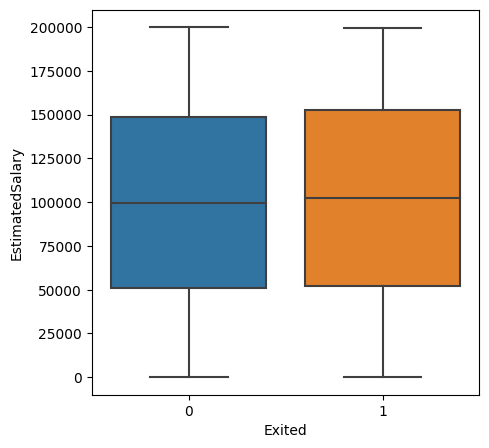

In [54]:
## Plot the boxplot for Exited and Estimated Salary
plt.figure(figsize=(5,5))
sns.boxplot(x='Exited',y='EstimatedSalary',data=df)
plt.show()

Exited              0     1    All
EstimatedSalary                   
All              7963  2037  10000
93132.61            0     1      1
91167.19            0     1      1
91556.57            0     1      1
91560.63            0     1      1
...               ...   ...    ...
23237.25            1     0      1
90384.26            1     0      1
90346.1             1     0      1
90305.97            1     0      1
100236.02           1     0      1

[10000 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


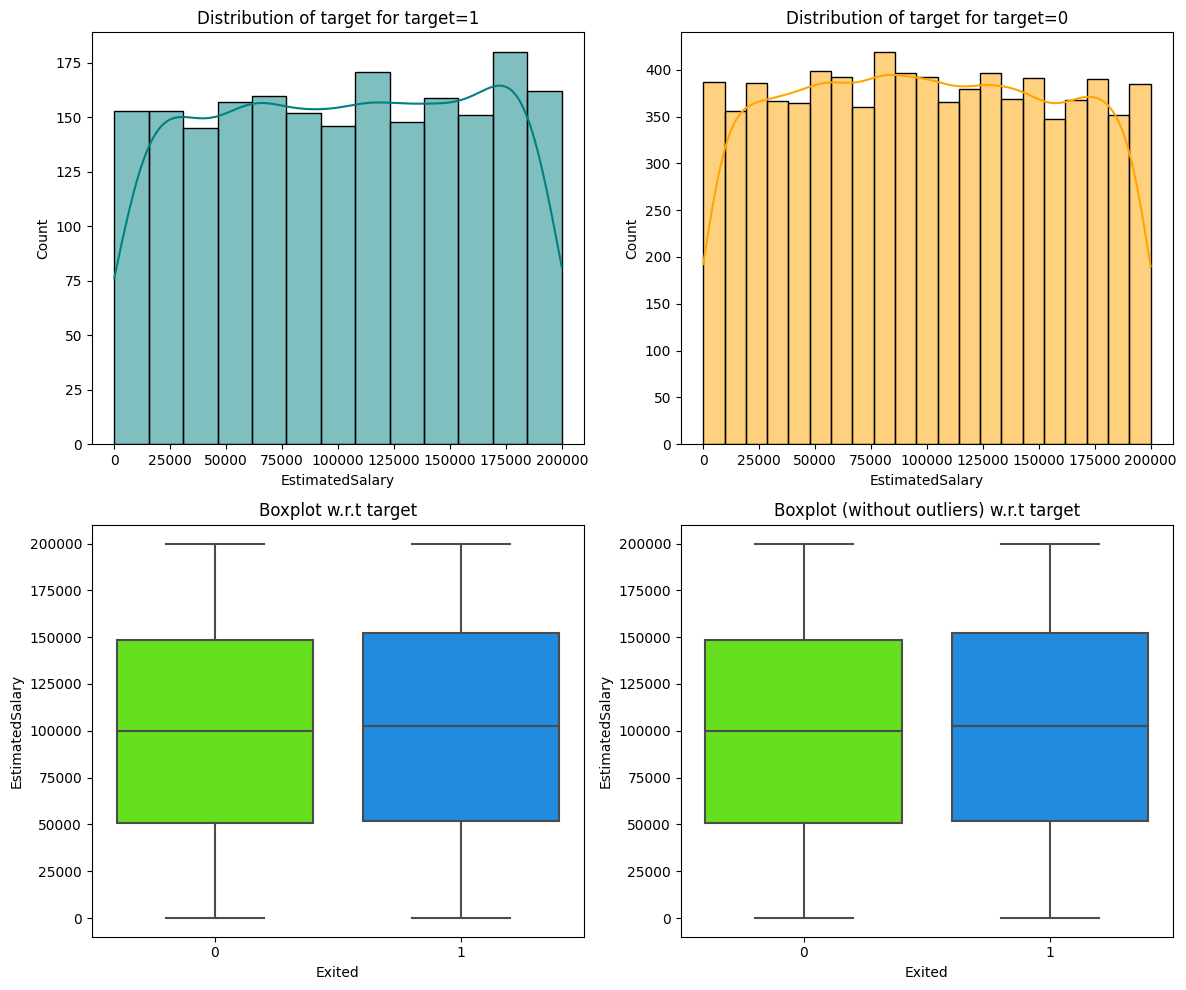

In [55]:
distribution_plot_wrt_target(df, "EstimatedSalary", "Exited")

In [56]:
mean_exited_es = df[df["Exited"]==1]["EstimatedSalary"].mean()
mean_notExited_es = df[df["Exited"]==0]["EstimatedSalary"].mean()
max_exited_es = df[df["Exited"]==1]["EstimatedSalary"].max()
max_notExited_es = df[df["Exited"]==0]["EstimatedSalary"].max()
median_exited_es = df[df["Exited"]==1]["EstimatedSalary"].median()
median_notExited_es = df[df["Exited"]==0]["EstimatedSalary"].median()
print("mean_exited: ",mean_exited_es,"mean_notExited: ",mean_notExited_es," median_exited: ",median_exited_es," median_notExited: ",median_notExited_es)
print("max_exited_es: ",max_exited_es," max_notExited_es: ",max_notExited_es)

mean_exited:  101465.67753068237 mean_notExited:  99738.39177194524  median_exited:  102460.84  median_notExited:  99645.04
max_exited_es:  199808.1  max_notExited_es:  199992.48


* Both the Estimated Salary distributions for exited and not exited customers shown above look very similar and don't have any outliers and do not seem to show any distinction between the two.

### **Questions**:

#### 1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?

lower_range:  383.0  upper_range:  919.0
mean:  650.5288  median:  652.0  min:  350  max:  850


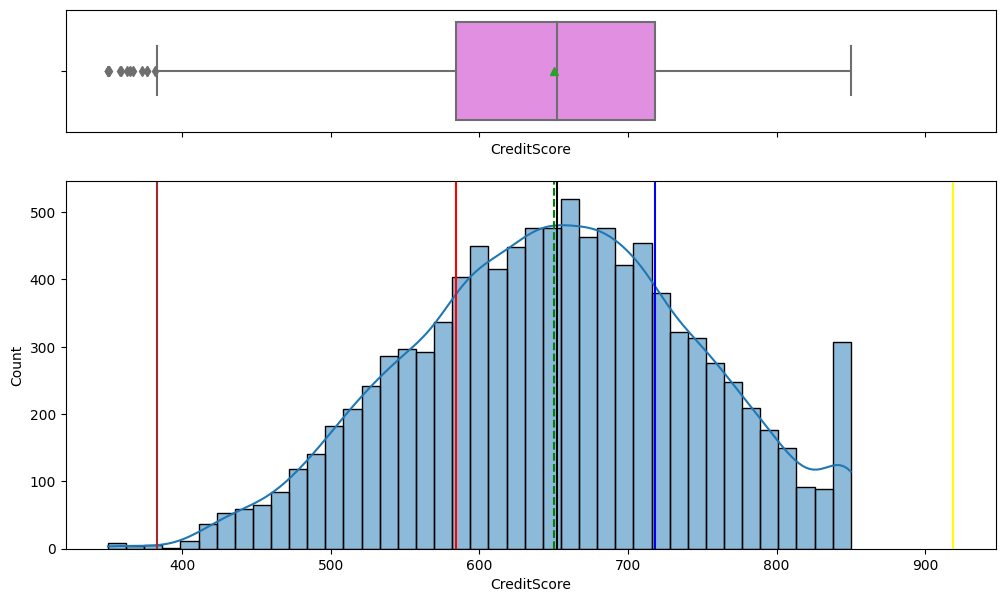

In [57]:
# Create histogram_boxplot for CreditScore and mark the min, Q1, mean, Q2, Q3 and max
histogram_boxplot(data, "CreditScore", kde=True)

lower_range = get_lower_upper(df["CreditScore"], False)
upper_range = get_lower_upper(df["CreditScore"])
print("lower_range: ",lower_range," upper_range: ",upper_range)
print("mean: ",df["CreditScore"].mean()," median: ",df["CreditScore"].median()," min: ", df["CreditScore"].min()," max: ", df["CreditScore"].max())


#### Observations:
* We can observe that the customer's credit score lies in the range of 383 and 919.
* The mean value is about 651 and median value is 652.
* The credit scores that lie below the value of 383 are the lower outliers as shown in the above histogram. The least credit score in the dataset is 350.
* The mean and median valus are very close together and so the distribution is almost normal distribution.

#### 2. How many active members are there with the bank?

In [58]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

#### Observations:
* There are 5151 customers who are active members in this dataset, i.e., the use bank products regularly, make transactions etc.
* There are 4849 customers who are inactive members in this dataset.

#### 3. How are the different customer attributes correlated to each other?

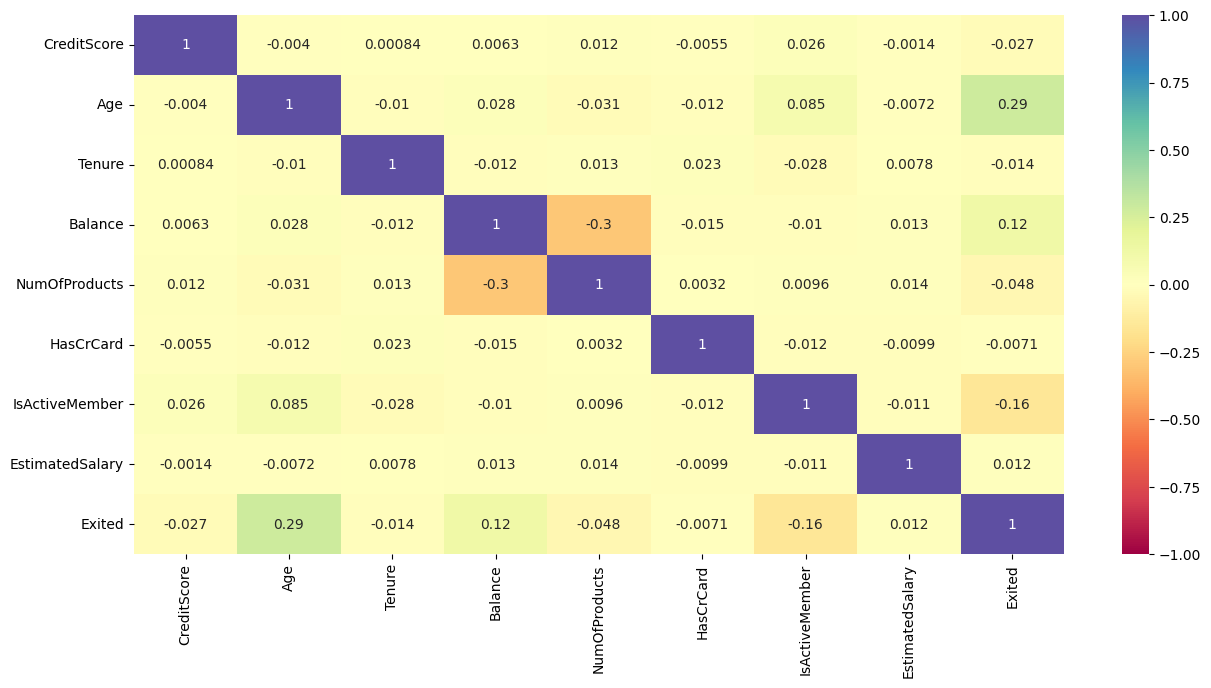

In [59]:
#Let us find the correlation and plot the heatmap
corr = df.corr()
#['cost_of_the_order','day_of_the_week','food_preparation_time', 'ratingnum']
plt.figure(figsize=(15, 7))
sns.heatmap(data=df.corr(), annot=True, vmin=-1, vmax=1,cmap="Spectral");
plt.show()

#### Observaions:
* From the heatmap we can observe that the Age and Exited columns are slightly positively correlated. So, the older customers are likely to churn.
* Balance is slightly positely correlated to EExited as well. So, the higher the balance, the customer might be likely to churn.
* The Balance and NumOfProducts are negatively correlated.So, lesser the balance, higher the number of products the customers have purchased through the bank.
* IsActiveMember is slightly negatively correlated to Exited. So, if the customer has not been an active member of the bank, they might churn.
* The rest of the columns are very less correlation with each other.

#### 4. Who is churning more when compared to males and females?  

In [60]:
print("Total no. of customers churned: ",df[df['Exited']==1]['Exited'].sum())
print("Total no. of Male customers churned: ",df[(df['Gender']=='Male')]['Exited'].sum())
print("Total no. of Female customers churned: ",df[(df['Gender']=='Female')]['Exited'].sum())

Total no. of customers churned:  2037
Total no. of Male customers churned:  898
Total no. of Female customers churned:  1139


#### Observaions:
* There are a total of 2037 customers who have churned in the dataset.
* No. of Male customers who have churned are 1139.
* No. of Female customers who have churned are 898.

#### 5. Customers from which geographical part are churning more?

In [61]:
print("Total no. of customers churned: ",df[df['Exited']==1]['Exited'].sum())
print("Total no. of customers from France churned: ",df[(df['Geography']=='France')]['Exited'].sum())
print("Total no. of customers from Germany churned: ",df[(df['Geography']=='Germany')]['Exited'].sum())
print("Total no. of customers from Spain churned: ",df[(df['Geography']=='Spain')]['Exited'].sum())

Total no. of customers churned:  2037
Total no. of customers from France churned:  810
Total no. of customers from Germany churned:  814
Total no. of customers from Spain churned:  413


#### Observaions:
* There are a total of 2037 customers who have churned in the dataset.
* No. of customers who have churned from France are 810.
* No. of customers who have churned from Germany are 814.
* No. of customers who have churned from Spain are 413.

## Data Preprocessing

* Missing value treatment





In [62]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [63]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Observation:
* There are no missing values and so we do not need to do any missing value treatment

#### Outlier detection and treatment (if needed)

**Let's find outliers in the data using z-score with a threshold of 3.**

The formula for z-score is:

z = (x-μ) / σ

where, μ is the mean and σ is the standard deviation

For a normal distribution of values of a column, the z-scores must lie in the range of -3 to +3. Any z-score that lies outside of this range can be considered as an outlier. Hence in the below code, we set threshold as 3 to get higher outliers and threshold as -3 to get lower outliers.

In [64]:
higherthreshold = 3
lowerthreshold = -3
higherout = {}
lowerout = {}
for col in df.describe().columns:
    i = df[col]
    mean = np.mean(df[col])
    std = np.std(df[col])
    higherOutliers = []
    lowerOutliers = []
    for v in i:
        z = (v - mean) / std
        if z > higherthreshold:
            higherOutliers.append(v)
        if z < lowerthreshold:
            lowerOutliers.append(v)
    higherOutliers.sort()
    lowerOutliers.sort()
    higherout[i.name] = higherOutliers
    lowerout[i.name] = lowerOutliers

print("The following are the outliers in the data:")
for key, value in higherout.items():
    print("\n Higher Outliers", key, ":", value)
for key, value in lowerout.items():
    print("\n Lower Outliers", key, ":", value)

The following are the outliers in the data:

 Higher Outliers CreditScore : []

 Higher Outliers Age : [71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 75, 75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 78, 78, 78, 78, 78, 79, 79, 79, 79, 80, 80, 80, 81, 81, 81, 81, 82, 83, 84, 84, 85, 88, 92, 92]

 Higher Outliers Tenure : []

 Higher Outliers Balance : []

 Higher Outliers NumOfProducts : [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

 Higher Outliers HasCrCard : []

 Higher Outliers IsActiveMember : []

 Higher Outliers


* From the above pairplot in the Bivariate section, we see that there are upper range outliers for the features Age and NumOfProducts. The customers who are older than 70 years of age come under higher outlier range. Also, the customers who have purchased 4 products or more through the bank come under the higher outlier range.
* Also, from the above pairplot in the Bivariate section, we see that there are lower range outliers for the feature CreditScore. The customers who have a credit score lower than 351 come under lower outlier range.
* The above code also confirms the same using the z-score calculations for the features Avg_Credit_Limit and Total_visits_online. The z-scores that lie outside the normal range of -3 and +3 are considered outliers.

**After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario. There might be customers who are older and might have very low credit scores, they might have purchased a lot more products through the bank, etc., and we would want our model to learn the underlying pattern for such customers.**

#### Preparing data for modeling

- We want to predict the churn.
- Before we proceed to build a model, We'll split the data into train and test to be able to evaluate the model that we build on the train data
-  we'll have to encode categorical features.
- We will build a model using the train data and then check it's performance

In [65]:
# Make a copy of the df dataset before splitting the dataset.
ds = df.copy()

In [66]:
## obtain the independent features into variable X
X = ds.drop(['Exited'],axis=1)
## obtain the dependent features into variable y
y = ds[['Exited']]

#### Feature engineering (if needed)

* We dropped the RowNumber, CustomerId and the Surname columns earlier as they were not adding value to this prediction problem.
* The columns Geography and Gender are categorical columns which need to be converted to numerical columns using one hot encoding.
* The columns need to also be scaled as the balance column has huge values compared to NumOfProducts, IsActiveMember etc.

**The above changes are made in the *Preparing data for modeling* section as these changes have to be made after spitting the dataset int training, testing and validation sets**

**Splitting the datasets into training, testing and validation sets**

In [67]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [68]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large,y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)

In [69]:
X_train.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
3006          747    France  Female   45       1  114959.12              1   
5735          585     Spain  Female   44       4       0.00              2   
5652          691    France  Female   29       9       0.00              2   
26            756   Germany    Male   36       2  136815.64              1   
3596          643    France    Male   36       0  148159.71              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
3006          1               0        189362.39  
5735          0               1        101728.46  
5652          0               0        199635.93  
26            1               1        170041.95  
3596          0               0         55835.66

In [70]:
print(X_train.shape, X_val.shape, X_test.shape)

(6400, 10) (1600, 10) (2000, 10)


**Create dummy variables for string type variables**

In [71]:
# Encoding Geography and Gender variables in the training, test and validation data
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True)
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)

#### Any other preprocessing steps (if needed)

**Normalize the numerical data**

In [72]:
## Scaling the data
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

**Which case is more important?**
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers.

**How to reduce this loss i.e need to reduce False Negative?**
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

**Create a function for plotting the confusion matrix**

In [73]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Building: Neural Network

In [74]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [75]:
# Initializing the ANN
model_1 = Sequential()
# Complete the code to Add the input layer with 64 neurons with relu as activation function with input of 11 variables
model_1.add(Dense(activation = 'relu', input_dim = 11, units=64))

# Complete the code to add the 1st hidden layer with 32 neurons
model_1.add(Dense(32, activation='relu'))

# Add the output layer with one node and sigmoid activation function
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model_1.add(Dense(1, activation = 'sigmoid'))

In [76]:
# Create optimizer with default learning rate
# Compile the model with SGD optimizer and binary cross entropy as loss with accuracy as metrics
model_1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
# Obtain the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
# Fit the model on train data for 100 epochs
history=model_1.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=100,
          batch_size=32)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.5214 - accuracy: 0.7875 - val_loss: 0.4830 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4739 - accuracy: 0.7964 - val_loss: 0.4583 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4546 - accuracy: 0.7969 - val_loss: 0.4439 - val_accuracy: 0.8019
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4424 - accuracy: 0.8005 - val_loss: 0.4357 - val_accuracy: 0.8075
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4346 - accuracy: 0.8034 - val_loss: 0.4306 - val_accuracy: 0.8112
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4295 - accuracy: 0.8080 - val_loss: 0.4276 - val_accuracy: 0.8150
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4257 - accuracy: 0.8112 - val_loss: 0.4254 - val_accuracy: 0.8144

**Loss function**

63/63 [==============================] - 0s 3ms/step - loss: 0.3464 - accuracy: 0.8570


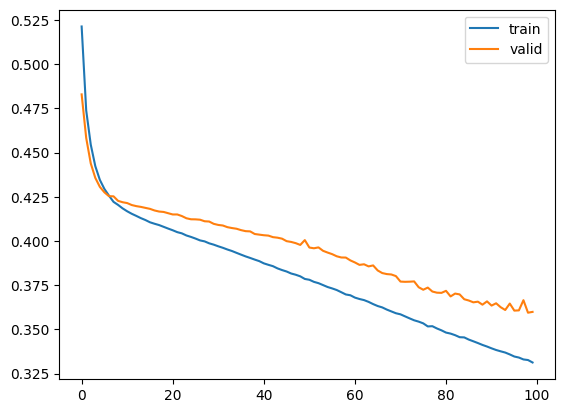

In [79]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

## Evaluate the model on X_test and y_test
results = model_1.evaluate(X_test, y_test)

**ROC-AUC curve**

200/200 [==============================] - 1s 2ms/step
Best Threshold=0.151338, G-Mean=0.791


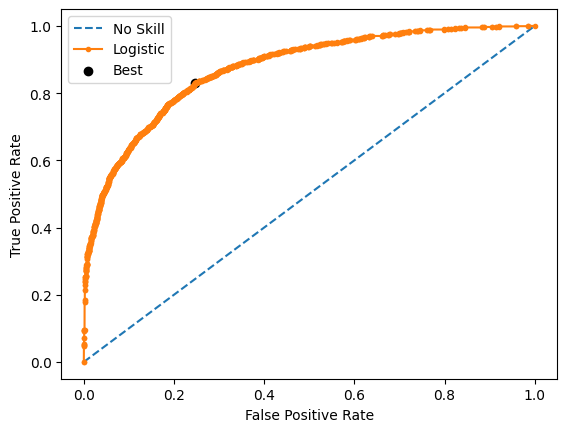

In [80]:
# predict probabilities
yhat = model_1.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**Predict the results using  the best  threshold**

In [81]:
## Obtain the prediction on X_val and obtain the confusion matrix
y_pred1=model_1.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > thresholds[ix])

y_pred1

50/50 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [82]:
# Obtain the classification repoort
cr_sgd =metrics.classification_report(y_val,y_pred1)
print(cr_sgd)

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1274
           1       0.43      0.79      0.56       326

    accuracy                           0.75      1600
   macro avg       0.68      0.76      0.69      1600
weighted avg       0.83      0.75      0.77      1600



**Confusion matrix**

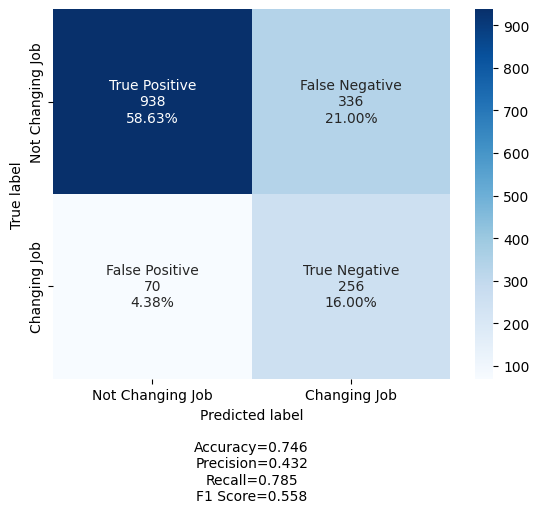

In [83]:
cm_sgd=confusion_matrix(y_val, y_pred1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm_sgd,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Building: Neural Network model with Adam Optimizer

In [84]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [85]:
def create_model():
      ## Initializing the neural network
      model = Sequential()

      ## Add the input layer with 64 neurons and relu as activation function
      model.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))

      ## Add the first hidden layer with 32 neurons with relu as activation functions
      model.add(Dense(32,activation='relu'))

      ## Add the output layer with Sigmoid Activation
      model.add(Dense(1, activation = 'sigmoid'))

      ## Initialize the model with Adam Optimer
      adam = tf.keras.optimizers.Adam(0.001)

      ## Compile the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
      return model

In [86]:
# Create the model 2
model_2 = create_model()

In [87]:
# Obtain the model_2 summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
## Fit the model on train data
history = model_2.fit(X_train, y_train,batch_size=32,validation_data=(X_val,y_val),epochs=100,verbose=1)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.4512 - accuracy: 0.7998 - val_loss: 0.4334 - val_accuracy: 0.8106
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4101 - accuracy: 0.8283 - val_loss: 0.4179 - val_accuracy: 0.8263
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3970 - accuracy: 0.8323 - val_loss: 0.4079 - val_accuracy: 0.8350
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3866 - accuracy: 0.8347 - val_loss: 0.4029 - val_accuracy: 0.8356
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3754 - accuracy: 0.8403 - val_loss: 0.3963 - val_accuracy: 0.8350
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3662 - accuracy: 0.8467 - val_loss: 0.3873 - val_accuracy: 0.8425
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3595 - accuracy: 0.8481 - val_loss: 0.3798 - val_accuracy: 0.8456

**Loss function**

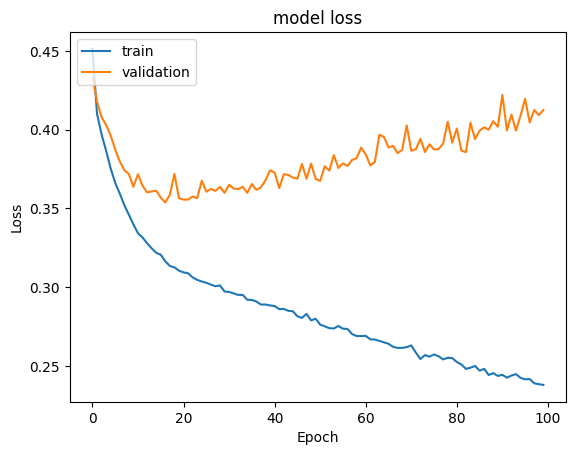

In [89]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Observations:
* The above plot shows that the while the loss in the train data decreases as epochs increases, the loss in the validation data first decreases and then starts to increase as epoch increases.
* This signifies that the model is overfitting to the training data.
* So, we need to stop the iterations once the overfitting starts. This can be done using the below **Early Stopping** method.

**Early stopping**

In [90]:
#Importing classback API
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

In [91]:
# Create model with early stopping
model_2ES = create_model()

# Obtain the model_2ES summary
model_2ES.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
## Fit the model on train data with early stopping
history_ES = model_2ES.fit(X_train, y_train,batch_size=32,validation_data=(X_val,y_val),epochs=100,verbose=1, callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 3s 6ms/step - loss: 0.4674 - accuracy: 0.7867 - val_loss: 0.4273 - val_accuracy: 0.8169
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4124 - accuracy: 0.8238 - val_loss: 0.4140 - val_accuracy: 0.8238
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3972 - accuracy: 0.8342 - val_loss: 0.4032 - val_accuracy: 0.8369
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3846 - accuracy: 0.8386 - val_loss: 0.3953 - val_accuracy: 0.8369
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3730 - accuracy: 0.8414 - val_loss: 0.3869 - val_accuracy: 0.8406
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3638 - accuracy: 0.8461 - val_loss: 0.3738 - val_accuracy: 0.8475
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3557 - accuracy: 0.8523 - val_loss: 0.3686 - val_accuracy: 0.8438

**Loss function**

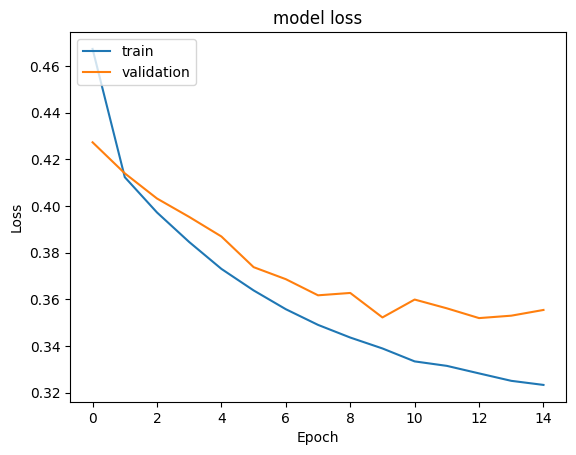

In [93]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_ES.history['loss'])
plt.plot(history_ES.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* We can see that after 15 iterations, the fitting stops.
* From the above plot, we can see that the loss of the validation data starts increasing and to tune the threshold using ROC-AUC


**ROC-AUC curve**

200/200 [==============================] - 1s 2ms/step
Best Threshold=0.171617, G-Mean=0.803


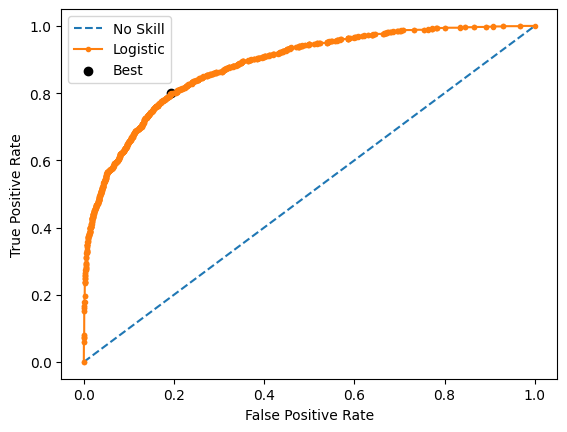

In [94]:
# predict probabilities
yhat = model_2ES.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**Predict the results using the best threshold**

In [95]:
#Predicting the results using best as a threshold
y_pred_e=model_2ES.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

50/50 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [96]:
# Obtain the classification repoort
cr_adam =metrics.classification_report(y_val,y_pred_e)
print(cr_adam)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1274
           1       0.49      0.76      0.59       326

    accuracy                           0.79      1600
   macro avg       0.71      0.78      0.72      1600
weighted avg       0.84      0.79      0.80      1600



**Confusion matrix**

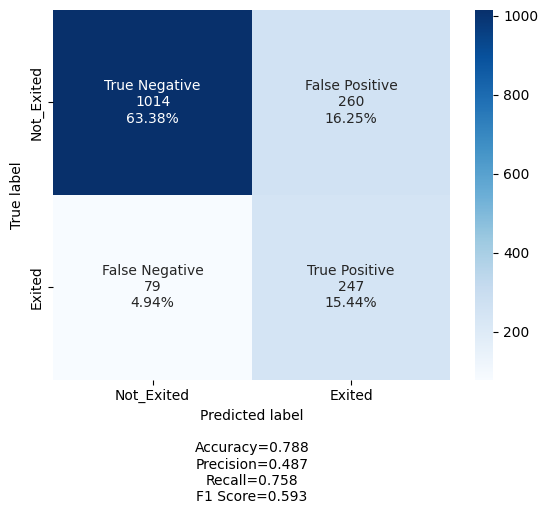

In [97]:
# Plot the confusion matrix with y_val and y_pred_e
cm1=confusion_matrix(y_val,y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')


### Model Improvement: Neural Network model with Batch Normalization

In [98]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [99]:
#Initializing the neural network
model_3 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model_3.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))

# Add Batch Normalization
model_3.add(BatchNormalization())

# Adding the first hidden layer with 16 neurons with relu as activation functions
model_3.add(Dense(32,activation='relu'))

# Add Batch Normalization
model_3.add(BatchNormalization())

# Adding the second hidden layer with 8 neurons with relu as activation functions
model_3.add(Dense(8,activation='relu'))

# Adding the output layer
model_3.add(Dense(1, activation = 'sigmoid'))

In [100]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Compile the model with binary cross entropy as loss function and accuracy as metrics
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [101]:
# Obtain the model_bn summary
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9

In [102]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Compile the model with binary cross entropy as loss function and accuracy as metrics
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [103]:
#Importing classback API
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

In [104]:
history_bnES = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 4s 6ms/step - loss: 0.5362 - accuracy: 0.7370 - val_loss: 0.4348 - val_accuracy: 0.8037
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4004 - accuracy: 0.8355 - val_loss: 0.3999 - val_accuracy: 0.8325
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3723 - accuracy: 0.8439 - val_loss: 0.3685 - val_accuracy: 0.8512
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3577 - accuracy: 0.8509 - val_loss: 0.3581 - val_accuracy: 0.8569
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3507 - accuracy: 0.8547 - val_loss: 0.3595 - val_accuracy: 0.8506
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3431 - accuracy: 0.8602 - val_loss: 0.3548 - val_accuracy: 0.8594
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3429 - accuracy: 0.8595 - val_loss: 0.3581 - val_accuracy: 0.8544

**Loss function**

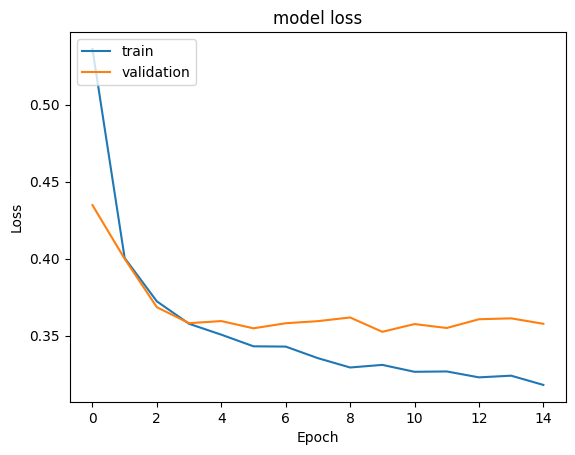

In [105]:
# Plot the Train Loss and Validation Loss
plt.plot(history_bnES.history['loss'])
plt.plot(history_bnES.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**ROC-AUC curve to obtain optimum threshold value**

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.195440, G-Mean=0.826


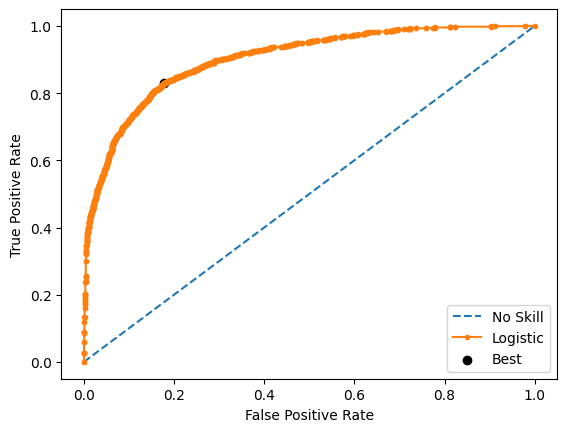

In [106]:
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**Predict the results using  the best  threshold**

In [107]:
#Predicting the results using best as a threshold
y_pred_bne=model_3.predict(X_val)
y_pred_bn = (y_pred_bne > thresholds[ix])
y_pred_bn

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [108]:
# Complete the code to obtain the classification report
cr_bn=metrics.classification_report(y_val,y_pred_bn)
print(cr_bn)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1274
           1       0.49      0.75      0.59       326

    accuracy                           0.79      1600
   macro avg       0.71      0.77      0.72      1600
weighted avg       0.84      0.79      0.80      1600



**Confusion report**

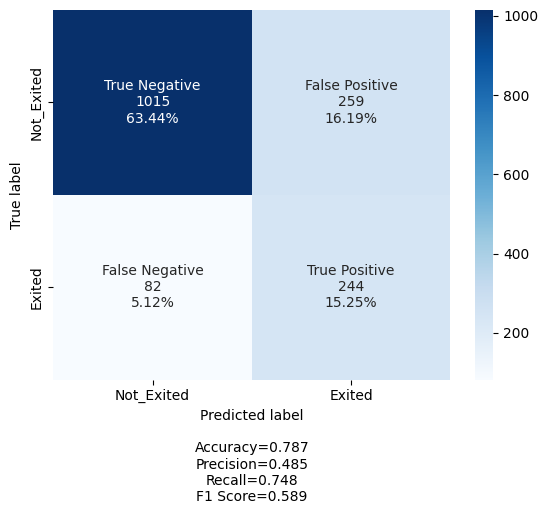

In [109]:
# Complete the code to obtain the confusion matrix

cm_bn=confusion_matrix(y_val, y_pred_bn)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_bn,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with Dropout

In [110]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [111]:
#Initializing the neural network
model_4 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model_4.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Add dropout with dropout_rate= 0.2
model_4.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model_4.add(Dense(16,activation='relu'))

# Add dropout with dropout_rate= 0.1
model_4.add(Dropout(0.1))
# Adding the second hidden layer with 8 neurons with relu as activation functions
model_4.add(Dense(8,activation='relu'))

# Adding the output layer
model_4.add(Dense(1, activation = 'sigmoid'))

In [112]:
# Initialize the ANN with Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Compile the model with binary cross entropy as loss function and accuracy as metrics
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [113]:
# Obtain the model_3 summary
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [114]:
#Importing classback API
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

In [115]:
# Fitting the ANN with batch_size = 32 and 100 epochs
history_4ES = model_4.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
200/200 [==============================] - 3s 7ms/step - loss: 0.5123 - accuracy: 0.7588 - val_loss: 0.4538 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4515 - accuracy: 0.7967 - val_loss: 0.4376 - val_accuracy: 0.7981
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4369 - accuracy: 0.8025 - val_loss: 0.4335 - val_accuracy: 0.8031
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4310 - accuracy: 0.8073 - val_loss: 0.4329 - val_accuracy: 0.8087
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4323 - accuracy: 0.8066 - val_loss: 0.4276 - val_accuracy: 0.8131
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4300 - accuracy: 0.8119 - val_loss: 0.4229 - val_accuracy: 0.8200
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4240 - accuracy: 0.8197 - val_loss: 0.4189 - val_accuracy: 0.8200

**Loss function**

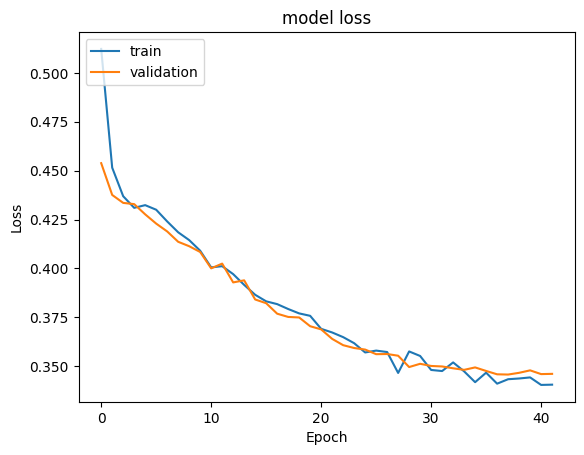

In [116]:
# Plot the Train Loss and Validation Loss
plt.plot(history_4ES.history['loss'])
plt.plot(history_4ES.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* The above plot shows that the loss curves of the train and validation data are very close and does not show any overfitting.

**ROC-AUC curve to obtain optimum threshold value**

200/200 [==============================] - 0s 2ms/step
Best Threshold=0.209295, G-Mean=0.796


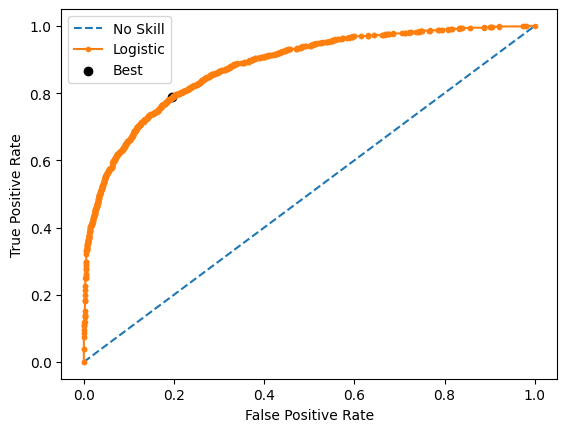

In [117]:
# predict probabilities
yhat = model_4.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**Predict the results using  the best  threshold**

In [118]:
#Predicting the results using best as a threshold
y_pred_e=model_4.predict(X_val)
y_pred_4 = (y_pred_e > thresholds[ix])
y_pred_4

50/50 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [119]:
# Complete the code to obtain the classification report
cr_dropout=metrics.classification_report(y_val,y_pred_4)
print(cr_dropout)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1274
           1       0.50      0.78      0.61       326

    accuracy                           0.80      1600
   macro avg       0.72      0.79      0.73      1600
weighted avg       0.84      0.80      0.81      1600



**Confusion report**

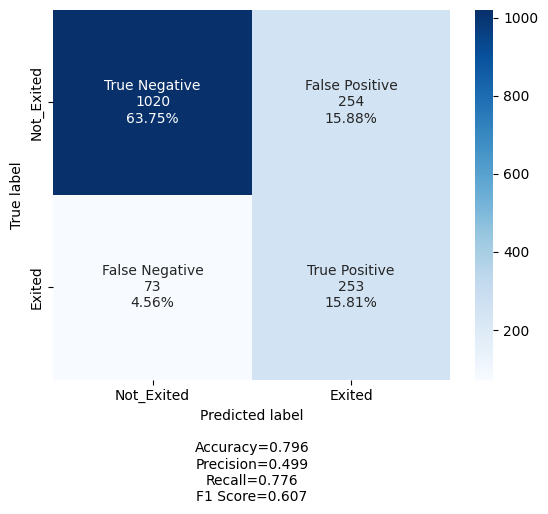

In [120]:
# Complete the code to obtain the confusion matrix

cm2=confusion_matrix(y_val, y_pred_4)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with Dropout more hidden layers

In [121]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [122]:
model5 = Sequential()
model5.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model5.add(Dropout(0.5))
model5.add(Dense(128,activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(64,activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(32,activation='relu'))
model5.add(Dense(1, activation = 'sigmoid'))

In [123]:
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [124]:
optimizer = tf.keras.optimizers.Adam(0.001)
model5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [125]:
history_5 = model5.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
80/80 [==============================] - 3s 9ms/step - loss: 0.5050 - accuracy: 0.7828 - val_loss: 0.4301 - val_accuracy: 0.8055
Epoch 2/50
80/80 [==============================] - 0s 6ms/step - loss: 0.4591 - accuracy: 0.7945 - val_loss: 0.4258 - val_accuracy: 0.8055
Epoch 3/50
80/80 [==============================] - 0s 6ms/step - loss: 0.4550 - accuracy: 0.7971 - val_loss: 0.4250 - val_accuracy: 0.8195
Epoch 4/50
80/80 [==============================] - 0s 6ms/step - loss: 0.4417 - accuracy: 0.8010 - val_loss: 0.4372 - val_accuracy: 0.8164
Epoch 5/50
80/80 [==============================] - 0s 6ms/step - loss: 0.4427 - accuracy: 0.8072 - val_loss: 0.4162 - val_accuracy: 0.8227
Epoch 6/50
80/80 [==============================] - 0s 6ms/step - loss: 0.4283 - accuracy: 0.8127 - val_loss: 0.4047 - val_accuracy: 0.8250
Epoch 7/50
80/80 [==============================] - 0s 4ms/step - loss: 0.4281 - accuracy: 0.8188 - val_loss: 0.4101 - val_accuracy: 0.8406
Epoch 8/50
80/80 [==

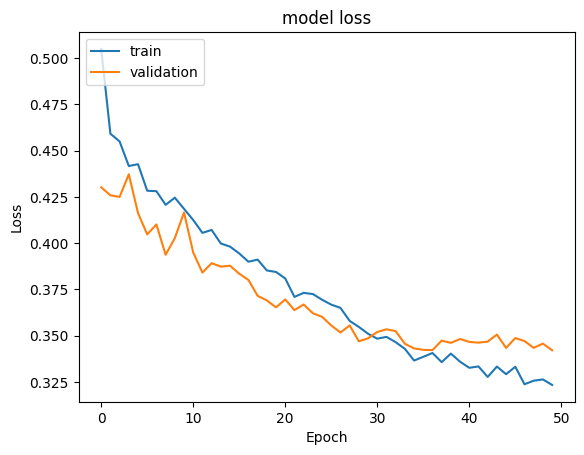

In [126]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

63/63 [==============================] - 0s 2ms/step
Best Threshold=0.196962, G-Mean=0.785


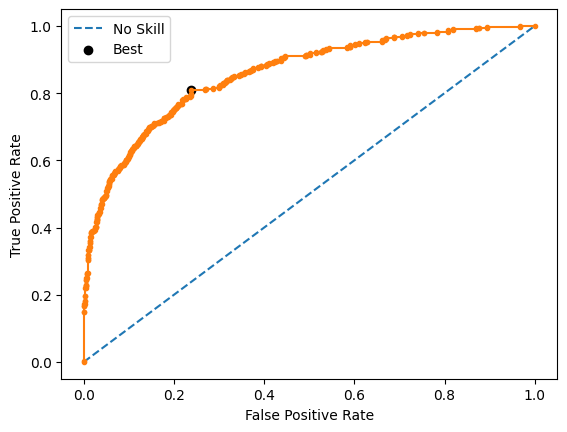

In [127]:
# predict probabilities
yhat5 = model5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [128]:
y_pred_e5=model5.predict(X_test)
y_pred_e5 = (y_pred_e5 > thresholds5[ix])
y_pred_e5

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

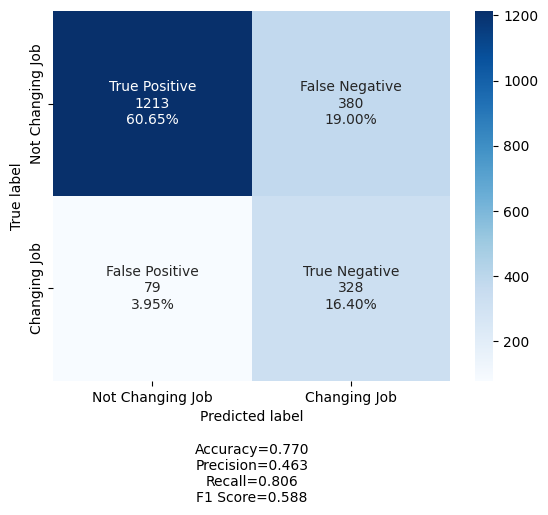

In [129]:
#Calculating the confusion matrix

cm5=confusion_matrix(y_test, y_pred_e5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm5,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

In [130]:
#Accuracy as per the classification report

cr5=metrics.classification_report(y_test,y_pred_e5)
print(cr5)

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1593
           1       0.46      0.81      0.59       407

    accuracy                           0.77      2000
   macro avg       0.70      0.78      0.71      2000
weighted avg       0.84      0.77      0.79      2000



### Model Improvement: Neural Network model with Hyperparameter tuning

In [131]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [132]:
def create_model_v6(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32):
    np.random.seed(1337)

    #Initializing the neural network
    model = Sequential()

    # This adds the input layer (by specifying input dimension)
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))

    ## Complete the code by adding dropout with dropout rate=0.5
    model.add(Dropout(0.5))

    # # Adding the hidden layer
    # Notice that we do not need to specify input dim.
    model.add(Dense(layer_2,activation='relu'))

    # # Adding the output layer
    # Notice that we do not need to specify input dim.
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    ## Complete the code to compile the model using binary_crossentropy as loss
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

**Using Grid search**

We are using grid search to optimize two hyperparameters called **batch size, epochs** due to the limited time. But you can optimize the other hyperparameters as mentioned above

In [133]:
## Call create_model_v6 function in KerasClassifier
keras_estimator = KerasClassifier(build_fn=create_model_v6, verbose=1)
print(keras_estimator.get_params().keys())

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])


In [134]:
# define the grid search parameters
"""
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1]}
"""
param_grid = {
    'batch_size':[40, 64, 128],
    'epochs':[50, 100, 150]}

kfold_splits = 3

grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [135]:
## Fit the model on train data and use x_val and y_val as validation data
grid_result = grid.fit(X_val, y_val,validation_data = (X_val,y_val),verbose=1)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Epoch 1/100
40/40 [==============================] - 1s 9ms/step - loss: 0.5491 - accuracy: 0.7563 - val_loss: 0.4805 - val_accuracy: 0.7962
Epoch 2/100
40/40 [==============================] - 0s 7ms/step - loss: 0.4820 - accuracy: 0.7956 - val_loss: 0.4515 - val_accuracy: 0.7975
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 0.4629 - accuracy: 0.8025 - val_loss: 0.4395 - val_accuracy: 0.8044
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 0.4500 - accuracy: 0.8056 - val_loss: 0.4348 - val_accuracy: 0.8037
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.4489 - accuracy: 0.8069 - val_loss: 0.4273 - val_accuracy: 0.8081
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 0.4436 - accuracy: 0.8087 - val_loss: 0.4252 - val_accuracy: 0.8112
Epoch 7/100
40/40 [==============================] - 0s 7ms/step - loss: 0.4421 - accuracy: 0.

**Let's create the final model with the obtained configuration after hyperparameter tuning**

In [136]:
# Creating the model
#estimator_v6=create_model_v6(lr=grid_result.best_params_['lr'])
estimator_v6=create_model_v6(lr=0.01)
# Printing model summary
estimator_v6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The best model has the following configuration:

**Result of Grid Search**

{'batch_size': 40, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration

In [137]:
# fit the model on train data and train the model with best batch_size obtained from hyperparameter tuning
history_h=estimator_v6.fit(X_train,y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val))
#history_h=estimator_v6.fit(X_train,y_train, epochs=grid_result.best_params_['epochs'], batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val))

Epoch 1/100
160/160 [==============================] - 2s 5ms/step - loss: 0.4530 - accuracy: 0.8008 - val_loss: 0.4385 - val_accuracy: 0.8062
Epoch 2/100
160/160 [==============================] - 1s 3ms/step - loss: 0.4268 - accuracy: 0.8186 - val_loss: 0.4180 - val_accuracy: 0.8281
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4145 - accuracy: 0.8277 - val_loss: 0.4206 - val_accuracy: 0.8213
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4142 - accuracy: 0.8291 - val_loss: 0.4252 - val_accuracy: 0.8319
Epoch 5/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4048 - accuracy: 0.8319 - val_loss: 0.3973 - val_accuracy: 0.8356
Epoch 6/100
160/160 [==============================] - 1s 4ms/step - loss: 0.4030 - accuracy: 0.8303 - val_loss: 0.3935 - val_accuracy: 0.8325
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.3987 - accuracy: 0.8369 - val_loss: 0.3918 - val_accuracy: 0.8288

**Loss funcion**

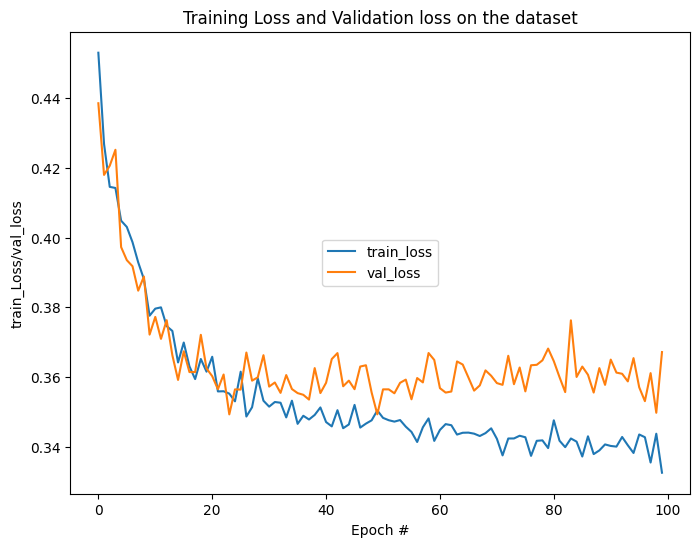

In [138]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

* There seems to be a lot of noise in the training and the validation data. Let us find the optimum threshold value using ROC-AUC curve as shown below.

**Optimum threshold usinf ROC-AUC curve**

200/200 [==============================] - 1s 2ms/step
Best Threshold=0.253773, G-Mean=0.806


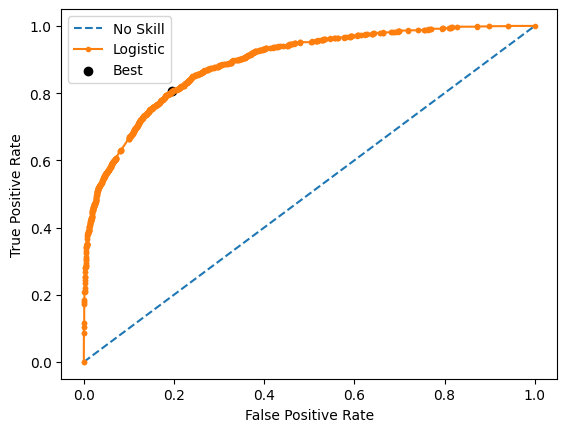

In [139]:
# predict probabilities
yhat = estimator_v6.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

**Predict the results using  the best  threshold**

In [140]:
# Obtain the predictions on X_val
y_pred_h = estimator_v6.predict(X_val)
print(y_pred_h)

50/50 [==============================] - 0s 2ms/step
[[0.10448246]
 [0.00265305]
 [0.04718517]
 ...
 [0.19667414]
 [0.36728966]
 [0.4097856 ]]


In [141]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false.
# So we will use the best cutoff value  to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [ True]]


**Classification report**

In [142]:
# Complete the code to obtain the classification report
cr6=metrics.classification_report(y_val,y_pred_h)
print(cr6)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1274
           1       0.47      0.74      0.58       326

    accuracy                           0.78      1600
   macro avg       0.70      0.76      0.71      1600
weighted avg       0.83      0.78      0.80      1600



**Confusion matrix**

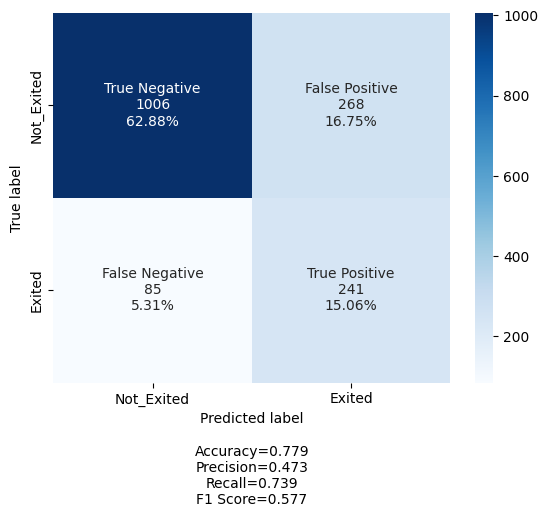

In [143]:
## Complete the code to obtain the confusion matrix
cm_h=confusion_matrix(y_val, y_pred_h)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with balanced data

**Now try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [144]:
## Complete the code to apply SMOTE on train data
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192, 1) 



<Axes: ylabel='count'>

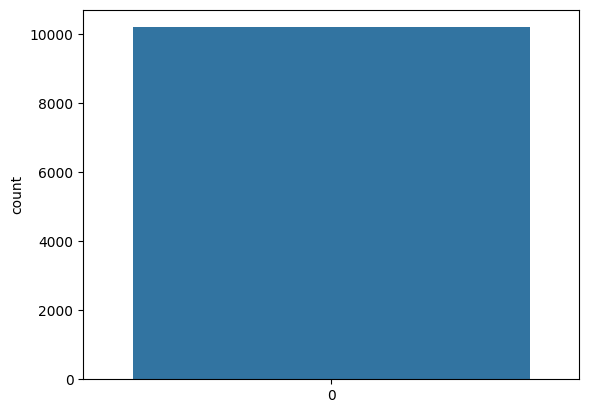

In [145]:
sns.countplot(y_train['Exited'])

**Build a model with the balanced dataset**

In [146]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [147]:
## Initilaize a sequential model
model_7 = Sequential()

# Add a input layer of 32 neurons with relu as activation function
model_7.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Add dropout with dropout rate=0.2
model_7.add(Dropout(0.2))
# Adding hidden layer with 16 neurons with relu as activation function
model_7.add(Dense(16,activation='relu'))

# Adding the dropout
model_7.add(Dropout(0.1))

## Add dense layers with 8 neurons
model_7.add(Dense(8,activation='relu'))

# Add suitable activation function in the final layer
model_7.add(Dense(1, activation = 'sigmoid'))

In [148]:
# obtain the summary of the model
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [149]:
# Complete the code to define earlystopping as callback
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Complining the model with binary cross entropy as loss and accuracy as metrics
model_7.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])

# Complete the code to fit the model on train with batch_size of 64, epochs of 100 and callbacks as earlystopping
history_7ES = model_7.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_data = (X_val,y_val),callbacks=[es_cb])

Epoch 1/100
160/160 [==============================] - 2s 5ms/step - loss: 0.6432 - accuracy: 0.6333 - val_loss: 0.5592 - val_accuracy: 0.7262
Epoch 2/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5762 - accuracy: 0.7093 - val_loss: 0.5494 - val_accuracy: 0.7312
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5575 - accuracy: 0.7249 - val_loss: 0.5267 - val_accuracy: 0.7362
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5484 - accuracy: 0.7318 - val_loss: 0.5455 - val_accuracy: 0.7200
Epoch 5/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5414 - accuracy: 0.7327 - val_loss: 0.5335 - val_accuracy: 0.7256
Epoch 6/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5314 - accuracy: 0.7353 - val_loss: 0.5340 - val_accuracy: 0.7300
Epoch 7/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5199 - accuracy: 0.7435 - val_loss: 0.5139 - val_accuracy: 0.7362

**Loss function**

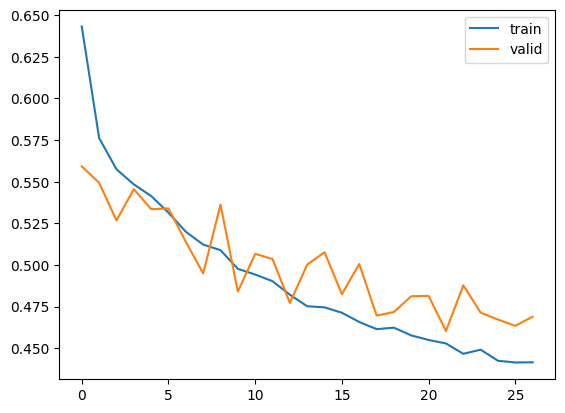

In [150]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_7ES.history)
hist['epoch'] = history_7ES.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

* The validation loss curve has too much noise. Let us use the ROC-AUC curve to find the optimum threshold value as shown below.

**Optimum threshold using ROC-AUC curve**

319/319 [==============================] - 1s 2ms/step
Best Threshold=0.507767, G-Mean=0.820


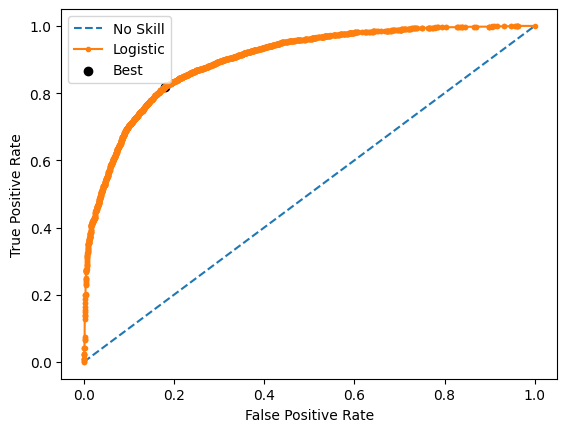

In [151]:
## Complete the code to find the optimal threshold using X_train
yhat = model_7.predict(X_train)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [152]:
## Complete the code to obtain the predictions on X_val
y_pred_s = model_7.predict(X_val)
#Predicting the results using tuned threshold
y_pred_s = (y_pred_s >thresholds[ix])
y_pred_s

50/50 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Classification report**

In [153]:
cr_s=metrics.classification_report(y_val,y_pred_s)
print(cr_s)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1274
           1       0.47      0.71      0.57       326

    accuracy                           0.78      1600
   macro avg       0.69      0.75      0.71      1600
weighted avg       0.82      0.78      0.79      1600



**Confusion matrix**

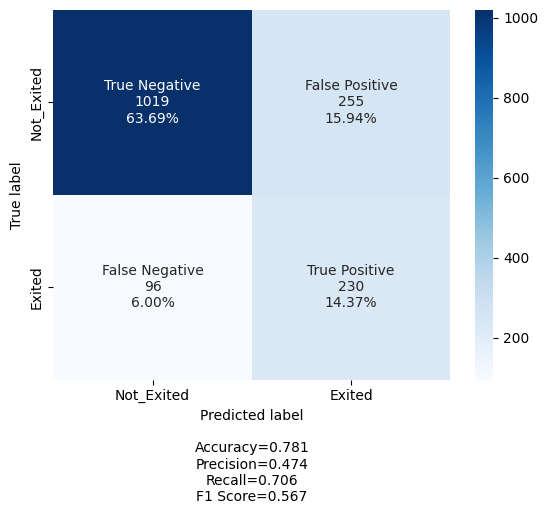

In [154]:
#Calculating the confusion matrix
cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Final Model

In [155]:
print("SGD: ")
print(cr_sgd)
print(50 *"*")
print("Adam: ")
print(cr_adam)
print(50 *"*")
print("Batch Normalization: ")
print(cr_bn)
print(50 *"*")
print("dropout: ")
print(cr_dropout)
print(50 *"*")
print("dropout with more hidden layer: ")
print(cr5)
print(50 *"*")
print("Hyperparameter tuning: ")
print(cr6)
print(50 *"*")
print("SMOTE: ")
print(cr_s)

SGD: 
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1274
           1       0.43      0.79      0.56       326

    accuracy                           0.75      1600
   macro avg       0.68      0.76      0.69      1600
weighted avg       0.83      0.75      0.77      1600

**************************************************
Adam: 
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1274
           1       0.49      0.76      0.59       326

    accuracy                           0.79      1600
   macro avg       0.71      0.78      0.72      1600
weighted avg       0.84      0.79      0.80      1600

**************************************************
Batch Normalization: 
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1274
           1       0.49      0.75      0.59       326

    accuracy                           0.79  

#### Obervations:

* Model 1: The first model uses the SGD optimizer and has the least accuracy and recall values.
* Model 2: The second model uses the Adam optimizer and this time there is an improvement in both the recall values for both exited and non exited classes and also the accuracy values.
* Model 3: The next model uses the Batch Normalization with Adam optimizer and we do not see any improvement in the recall and accuracy values when compared to Model 2.
* Model 4: We next try dropout with Adam optimizer. This time around, we see a small improvement in the recall scores and the accuracy increases from 79% to 80%.
* Model 5: Since dropout worked, we next try to increase the number of hidden layers with more nodes in each hidden layers. When we plot the loss function of the training and the validation data, we see that the noise has incresed when compared to the prior dropout model. The recall vlues and accuracy values also drop a bit to 79%.
* Model 6: Next, we try Hyperparameter tuning using the grid searchCV method to find the optimum batchsize and learning rate. This model has even lower recall scores and the accuracy also droped to 78%.
* Model 7: Lastly, we used SMOTE technique to upscale the imbalanced dataset. This model also does not improve the recall and the accuracy scores.
* So, we will choose the Model 4, which uses the Dropout regularization technique and works on the imbalanced dataset. as our final model to predict the test data as shown below:

319/319 [==============================] - 1s 2ms/step
Best Threshold=0.213742, G-Mean=0.812


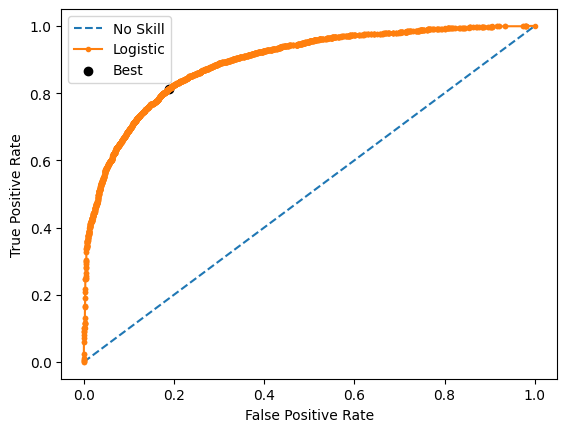

In [156]:

# predict probabilities using the best model
yhat = model_4.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


In [157]:
# Predict the X_test data using the best model
y_pred_test = model_4.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


**Classification report**

In [158]:
## Obtain the classification report on y_test and the predicted values
cr_final=metrics.classification_report(y_test,y_pred_test)
print(cr_final)

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1593
           1       0.49      0.77      0.60       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.80      2000



**Confusion report**

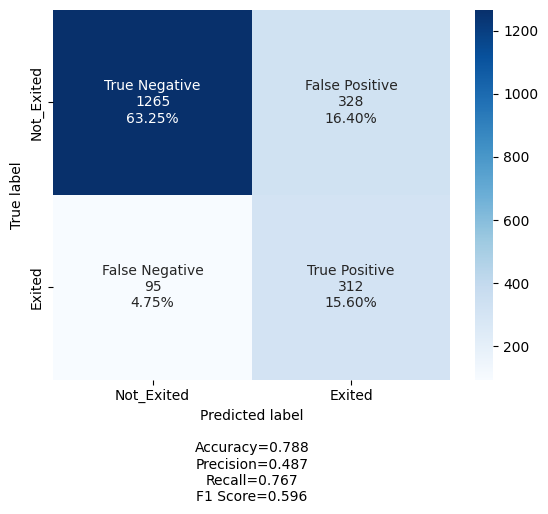

In [159]:
# Obtain the confusion matrix
cm_final=confusion_matrix(y_test,y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_final,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Actionable Insights and Recommendations

**Actionable Insights**

* There is no significant difference in the credit score distribution between retained and churned customers.
* The mean age of retained customers is 37 and mean age of customers who have churned is 45 years.
* With respect to tenure, the distribution is normal for both the churned and retained customers and does not have an effect on te likelihood of exiting.
* Cusomers in Germany are exiting more than France and Spain.
* Females are exiting slightly more than male customers.
* Altough number of products do not seem to have any significance in the prediction of churn, some exited customers seem to have more number of products than the retained customers.
* The salary does not seem to have any significant contribution to the likelihood to churn as the estimated salary distributions of exited and retained customers look very similar.
* The account balance of the exited customers has a higher mean of 91,108 dollars where as the mean balance of the retained customer is 72,745 dollars.So, customers with higher balances seem to be exiting the bank.
* Also, more customers who are active members of the bank have exited than the customers who are inactive.


**What recommedations would you suggest to the bank?**

* Since more customers who are churning are from Germany and least from Spain, we need to collect more data and try to figure out what could be working in Sapin and France that is not working in Germany.
* The older customers who are above 45 years of age are exiting more than custoemrs who are younger. The bank needs to offer rewards and services that targets that age group.
* Females are churing a little more than men. Again, it would be great to offer targetted services and reards, such as shopping or spa reward points, etc.
* Customers with higher balances are also churning more. The bank can offer higher interest rates for a limited time period if they deposited the balance for a set number of months, such as CDs, etc.
* For customers with higher balances, the bank could offer premium accounts with free advisors, personal assistance, better interest rates, etc. to retain the customers.

___